In [157]:
import pandas as pd
df=pd.read_csv("/kaggle/input/crisis/crisis.csv")

In [158]:
display(df)

,tweet,label
0,sandy soooo mad shattering door shiet,2012_Sandy_Hurricane
1,neighborly duty arrives rescue sporting spelun...,2012_Sandy_Hurricane
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane
3,already flooded much hoboken,2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive att...,2012_Sandy_Hurricane
...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion
32458,ok im going put people comparing explosion tx ...,2013_West_Texas_Explosion
32459,rt chaplain prayed wman knocked foot explosion...,2013_West_Texas_Explosion
32460,u stil confirmed death fertilizer plant explos...,2013_West_Texas_Explosion


In [159]:
df['tweet'] = df['tweet'].fillna('')
df

,tweet,label
0,sandy soooo mad shattering door shiet,2012_Sandy_Hurricane
1,neighborly duty arrives rescue sporting spelun...,2012_Sandy_Hurricane
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane
3,already flooded much hoboken,2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive att...,2012_Sandy_Hurricane
...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion
32458,ok im going put people comparing explosion tx ...,2013_West_Texas_Explosion
32459,rt chaplain prayed wman knocked foot explosion...,2013_West_Texas_Explosion
32460,u stil confirmed death fertilizer plant explos...,2013_West_Texas_Explosion


In [160]:
import pandas as pd
from collections import Counter
import re
def tokenize_tweets(tweets):
    all_words = []
    for tweet in tweets:
        # Remove punctuation and convert to lowercase
        tweet = re.sub(r'[^\w\s]', '', tweet.lower())
        words = tweet.split()
        all_words.extend(words)
    return all_words

# Tokenize the tweets
words = tokenize_tweets(df['tweet'])

# Count the frequency of each word
word_counts = Counter(words)

In [150]:
word_counts
len(word_counts)

16709

In [161]:
df['tweet'] = df['tweet'].str.replace(r'#\w+', '', regex=True).str.strip()

In [162]:
df=df.reset_index(drop=True)

In [153]:
display(df)

,tweet,label
0,sandy soooo mad shattering door shiet,2012_Sandy_Hurricane
1,neighborly duty arrives rescue sporting spelun...,2012_Sandy_Hurricane
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane
3,already flooded much hoboken,2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive att...,2012_Sandy_Hurricane
...,...,...
32438,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion
32439,ok im going put people comparing explosion tx ...,2013_West_Texas_Explosion
32440,rt chaplain prayed wman knocked foot explosion...,2013_West_Texas_Explosion
32441,u stil confirmed death fertilizer plant explos...,2013_West_Texas_Explosion


In [163]:
df['tweet'] = df['tweet'].str.replace(r'\bRT\b', '', case=False, regex=True).str.strip()
df

,tweet,label
0,sandy soooo mad shattering door shiet,2012_Sandy_Hurricane
1,neighborly duty arrives rescue sporting spelun...,2012_Sandy_Hurricane
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane
3,already flooded much hoboken,2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive att...,2012_Sandy_Hurricane
...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion
32458,ok im going put people comparing explosion tx ...,2013_West_Texas_Explosion
32459,chaplain prayed wman knocked foot explosion ca...,2013_West_Texas_Explosion
32460,u stil confirmed death fertilizer plant explos...,2013_West_Texas_Explosion


In [164]:
!pip install spacy


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [165]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [166]:
import pandas as pd
import re
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


# Define a function to preprocess tweets
def preprocess_tweet(tweet):
    # Convert to lower case
    tweet = tweet.lower()
    
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    
    # Tokenization and lemmatization with spaCy
    doc = nlp(tweet)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to the 'tweet' column
df['tweet'] = df['tweet'].apply(preprocess_tweet)

display(df)


,tweet,label
0,sandy soooo mad shatter door shiet,2012_Sandy_Hurricane
1,neighborly duty arrive rescue sporting spelunk...,2012_Sandy_Hurricane
2,not know m get jersey train subway not run,2012_Sandy_Hurricane
3,flood hoboken,2012_Sandy_Hurricane
4,note pray stay safe positive attitude,2012_Sandy_Hurricane
...,...,...
32457,fertilizer plant explosion late night texas,2013_West_Texas_Explosion
32458,ok m going people compare explosion tx maratho...,2013_West_Texas_Explosion
32459,chaplain pray wman knock foot explosion not ho...,2013_West_Texas_Explosion
32460,u stil confirm death fertilizer plant explosio...,2013_West_Texas_Explosion


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32462 entries, 0 to 32461
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   32462 non-null  object
 1   label   32462 non-null  object
dtypes: object(2)
memory usage: 507.3+ KB


In [27]:
df.describe()

,tweet,label
count,32462,32462
unique,25171,6
top,baby stuffed bag hoisted flood australia power...,2012_Sandy_Hurricane
freq,243,6138


In [28]:
print(df['label'].value_counts())

label
2012_Sandy_Hurricane         6138
2013_Boston_Bombings         5648
2013_Queensland_Floods       5414
2013_West_Texas_Explosion    5246
2013_Alberta_Floods          5189
2013_Oklahoma_Tornado        4827
Name: count, dtype: int64


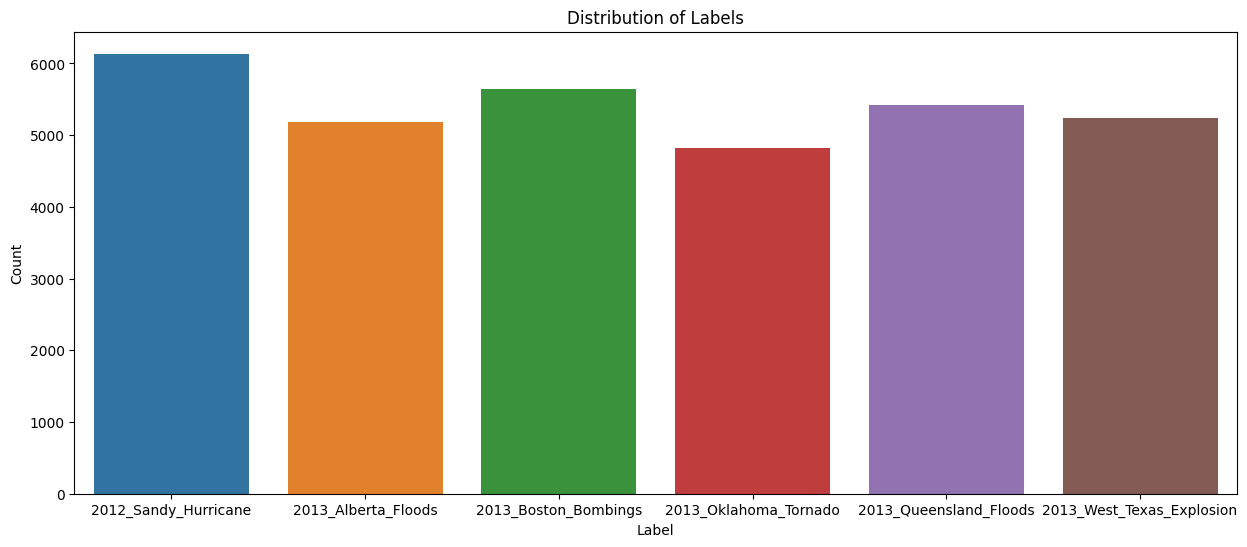

In [15]:
# Plotting the label distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Tweet Length Statistics
count    32462.000000
mean        58.463065
std         21.163467
min          0.000000
25%         43.000000
50%         58.000000
75%         74.000000
max        127.000000
Name: tweet_length, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


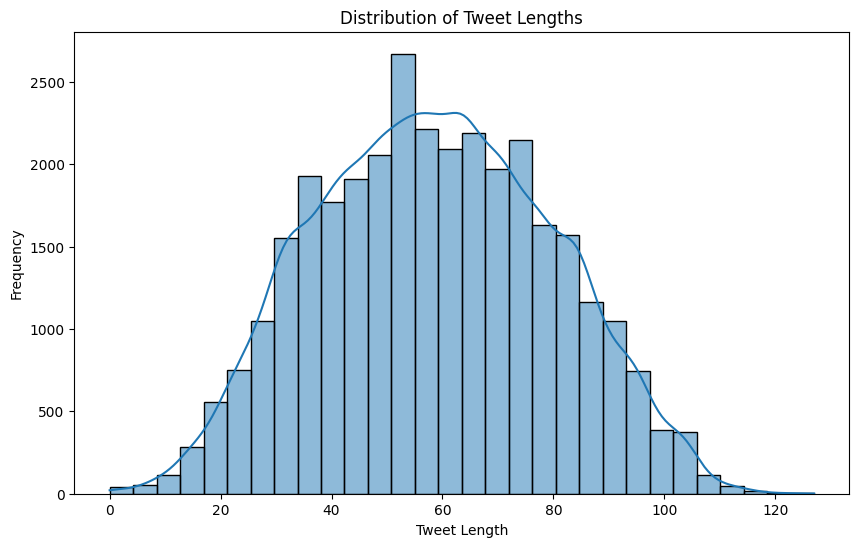

In [16]:
df['tweet_length'] = df['tweet'].apply(len)

# Summary statistics for tweet lengths
print("\nTweet Length Statistics")
print(df['tweet_length'].describe())

# Plotting the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

Skewness of Tweet Lengths: 0.04576436105026608


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


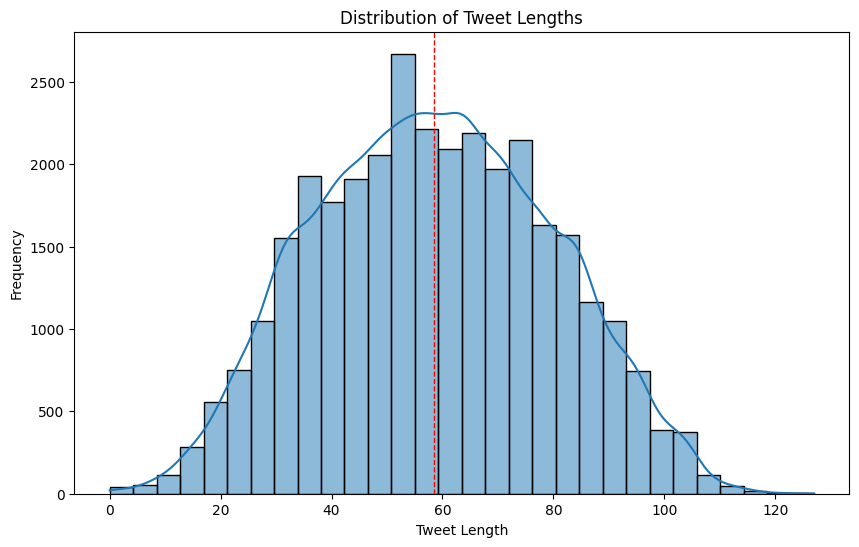

In [25]:
from scipy.stats import skew

# Calculate skewness for tweet lengths
tweet_length_skewness = skew(df['tweet_length'])
print(f"Skewness of Tweet Lengths: {tweet_length_skewness}")

# Plotting the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.axvline(df['tweet_length'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.show()


In [26]:
# Calculate skewness for sentiment polarity
sentiment_polarity_skewness = skew(df['sentiment_polarity'])
print(f"Skewness of Sentiment Polarity: {sentiment_polarity_skewness}")

# Plotting the distribution of sentiment polarity
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_polarity'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.axvline(df['sentiment_polarity'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.show()


KeyError: 'sentiment_polarity'

In [23]:
# Calculate the count of each label
label_counts = df['label'].value_counts()

# Calculate the proportion of each label
label_proportions = label_counts / len(df) * 100

print("Label Proportions")
print(label_proportions)


Label Proportions
label
2012_Sandy_Hurricane         18.908262
2013_Boston_Bombings         17.398805
2013_Queensland_Floods       16.677962
2013_West_Texas_Explosion    16.160434
2013_Alberta_Floods          15.984844
2013_Oklahoma_Tornado        14.869694
Name: count, dtype: float64


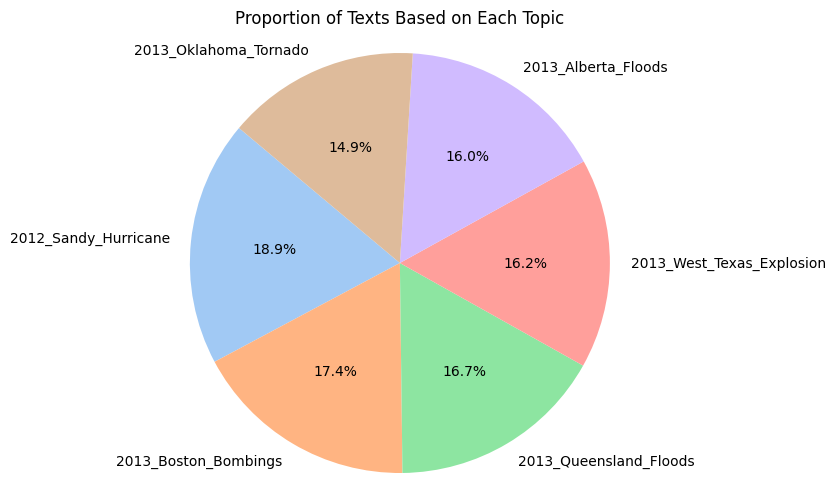

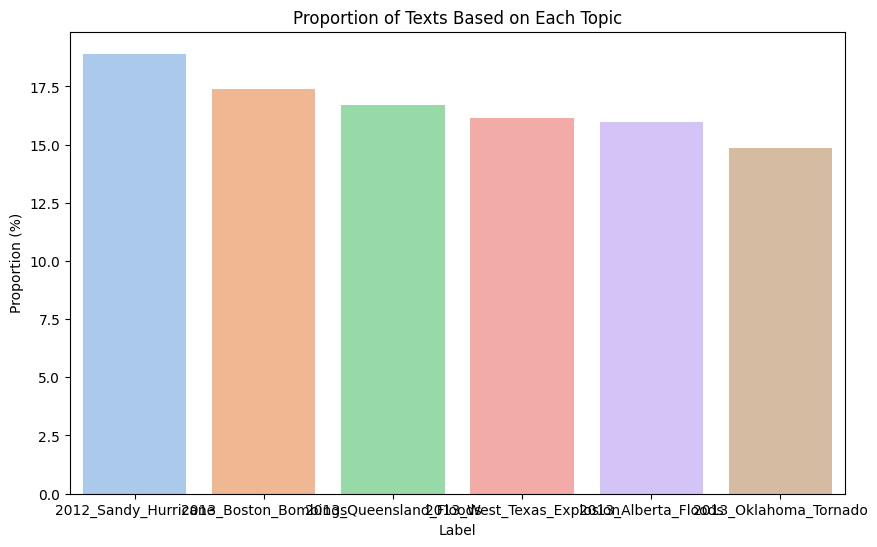

In [24]:
# Plotting the proportions using a pie chart
plt.figure(figsize=(10, 6))
plt.pie(label_proportions, labels=label_proportions.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Texts Based on Each Topic')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Plotting the proportions using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=label_proportions.index, y=label_proportions, palette='pastel')
plt.title('Proportion of Texts Based on Each Topic')
plt.xlabel('Label')
plt.ylabel('Proportion (%)')
plt.show()


In [9]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

# Ensure you have the required NLTK data
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def preprocess_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuations])
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word.lower() not in stop_words]
    return words

df['processed_tweet'] = df['tweet'].apply(preprocess_text)

# Flatten the list of lists into a single list of words
all_words = [word for tweet in df['processed_tweet'] for word in tweet]

# Get the most common words
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

print("\nMost Common Words")
print(common_words)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Most Common Words
[('flood', 6622), ('hurricane', 5000), ('explosion', 4678), ('boston', 4216), ('texas', 3549), ('queensland', 2903), ('oklahoma', 2589), ('sandy', 2572), ('tornado', 2457), ('plant', 2127), ('people', 2043), ('marathon', 2040), ('bombing', 1956), ('australia', 1928), ('fertilizer', 1704), ('victim', 1651), ('west', 1527), ('help', 1488), ('prayer', 1456), ('go', 1327)]


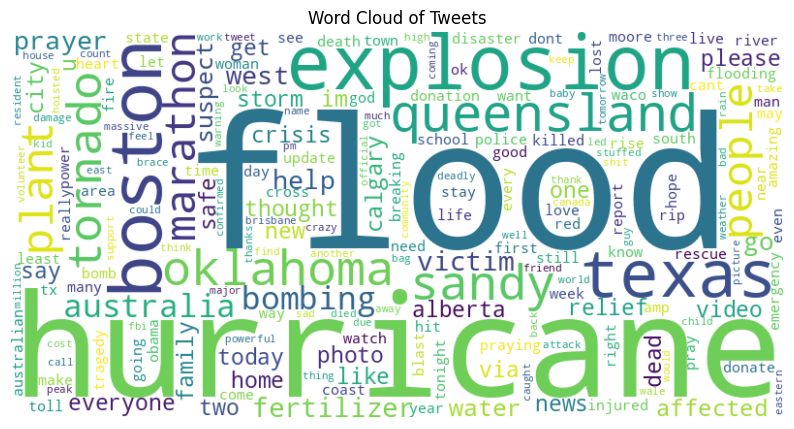

In [18]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()


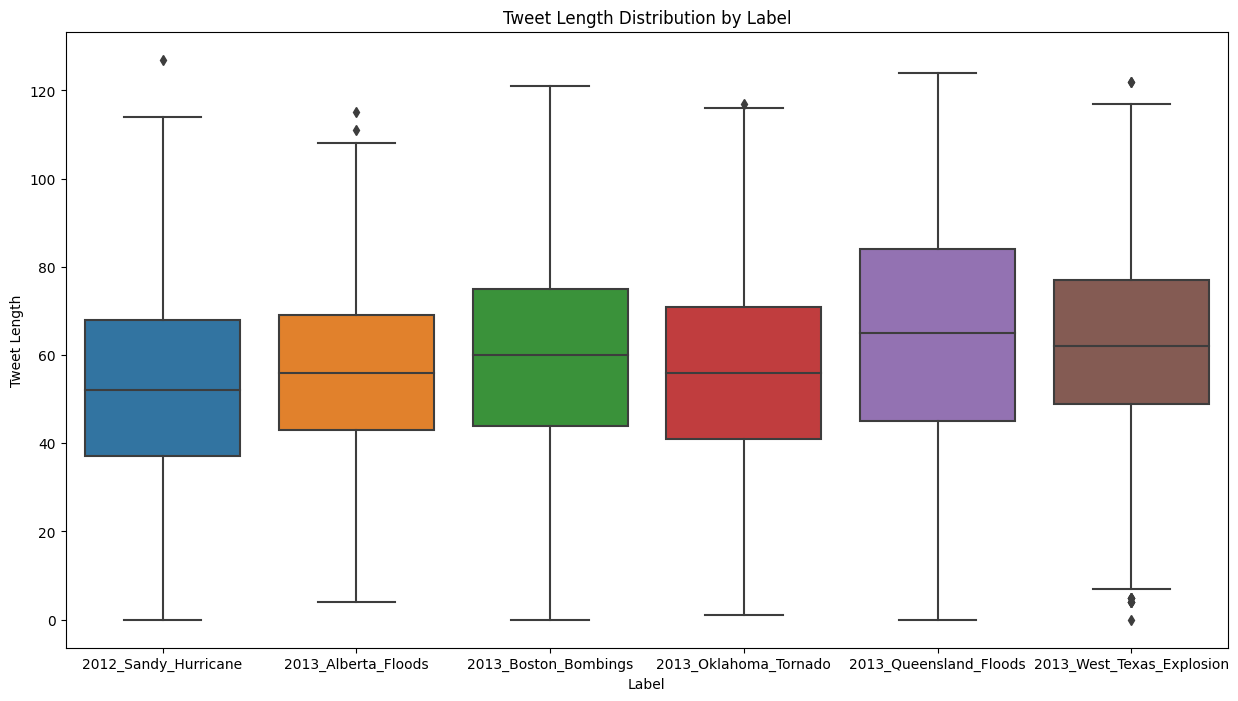

In [20]:
# Plotting tweet lengths across different labels
plt.figure(figsize=(15, 8))
sns.boxplot(x='label', y='tweet_length', data=df)
plt.title('Tweet Length Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Tweet Length')
plt.show()


In [118]:
import pandas as pd
from collections import Counter
import re


# Function to clean and tokenize tweets
def tokenize_tweets(tweets):
    all_words = []
    for tweet in tweets:
        # Remove punctuation and convert to lowercase
        tweet = re.sub(r'[^\w\s]', '', tweet.lower())
        words = tweet.split()
        all_words.extend(words)
    return all_words

# Tokenize the tweets
words = tokenize_tweets(df['tweet'])

# Count the frequency of each word
word_counts = Counter(words)

# Convert to DataFrame
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Reset the index
word_freq_df = word_freq_df.reset_index(drop=True)

# Display the DataFrame
print(word_freq_df)


                 Word  Frequency
0               flood       6622
1           hurricane       5000
2           explosion       4678
3              boston       4216
4               texas       3549
...               ...        ...
16703         vatican          1
16704           searc          1
16705  plantexplosion          1
16706    controoooool          1
16707         sarcasm          1

[16708 rows x 2 columns]


In [119]:
word_freq_df[word_freq_df["Frequency"]<=5].reset_index(drop=True).count()

Word         12744
Frequency    12744
dtype: int64

In [120]:
remove_word=word_freq_df[word_freq_df["Frequency"]<=5]

In [121]:
removed_words_set = set(remove_word['Word'])
removed_words_set

{'jane',
 'refusing',
 'europagastown',
 'bixby',
 'ti',
 'pamper',
 'lightening',
 'unfbelievable',
 'checkpoint',
 'weekly',
 'diesel',
 'glady',
 'josephmichaelmatos',
 'officenew',
 'zmerch',
 'puddle',
 'loaned',
 'acoustic',
 'disastervolcanohurricanei',
 'heck',
 'earle',
 'caitlyni',
 'thin',
 'prematurely',
 'farewell',
 'innovation',
 'gusty',
 'endthis',
 'flurry',
 'dor',
 'oneinyear',
 'zendaya',
 'mediawhore',
 'passedd',
 'criticizing',
 'inconsiderate',
 'zowie',
 'mdda',
 'quieting',
 'kolaches',
 'watershed',
 'itsexos',
 'postal',
 'validated',
 'leo',
 'reboundi',
 'skating',
 'pavlich',
 'merc',
 'manchester',
 'pasta',
 'distributed',
 'frank',
 'encounter',
 'sudha',
 'implement',
 'relate',
 'mahal',
 'tweetingretweeting',
 'nema',
 'mv',
 'outraged',
 'thoug',
 'gtpd',
 'jewel',
 'shid',
 'venue',
 'pushup',
 'fabutan',
 'talkin',
 'aryers',
 'thinkin',
 'attract',
 'excep',
 'porsche',
 'launchedqueensland',
 'waltham',
 'scone',
 'offhalloween',
 'stir',
 'dn

In [122]:
def remove_words_from_tweets(tweets, words_to_remove):
    cleaned_tweets = []
    for tweet in tweets:
        # Remove punctuation and convert to lowercase
        tweet = re.sub(r'[^\w\s]', '', tweet.lower())
        words = tweet.split()
        # Remove words that are in the removed_words_set
        cleaned_words = [word for word in words if word not in words_to_remove]
        cleaned_tweet = ' '.join(cleaned_words)
        cleaned_tweets.append(cleaned_tweet)
    return cleaned_tweets

# Clean the tweets
df['tweet'] = remove_words_from_tweets(df['tweet'], removed_words_set)

# Display the DataFrame
display(df)

,tweet,label
0,sandy mad door,2012_Sandy_Hurricane
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane
3,already flooded much,2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane
...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion


In [123]:
def tokenize_tweets(tweets):
    all_words = []
    for tweet in tweets:
        # Remove punctuation and convert to lowercase
        tweet = re.sub(r'[^\w\s]', '', tweet.lower())
        words = tweet.split()
        all_words.extend(words)
    return all_words

# Tokenize the tweets
words = tokenize_tweets(df['tweet'])

# Count the frequency of each word
word_counts = Counter(words)

In [67]:
len(word_counts)

3964

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

"""
Trigram occurrence (TriG). Similar to the earlier bigram occurrence, except that we
model a relationship between three words in a trigram, i.e., there is an additional
edge between the first and third word.
"""

def Trigram(df):
    # Create a graph
    G = nx.Graph()

    # Collect all unique words from the tweets
    all_words = set(word for tweet in df['tweet'] for word in tweet.split())

    for word in all_words:
        G.add_node(word)

    for tweet in df['tweet']:
        words = tweet.split()
        for i in range(2, len(words)):
            # Add edge between the first and second word
            if G.has_edge(words[i-2], words[i-1]):
                G[words[i-2]][words[i-1]]['weight'] += 1
            else:
                G.add_edge(words[i-2], words[i-1], weight=1)

            # Add edge between the second and third word
            if G.has_edge(words[i-1], words[i]):
                G[words[i-1]][words[i]]['weight'] += 1
            else:
                G.add_edge(words[i-1], words[i], weight=1)

            # Add edge between the first and third word
            if G.has_edge(words[i-2], words[i]):
                G[words[i-2]][words[i]]['weight'] += 1
            else:
                G.add_edge(words[i-2], words[i], weight=1)

    return G
G = Trigram(df)

In [124]:
display(df)

,tweet,label
0,sandy mad door,2012_Sandy_Hurricane
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane
3,already flooded much,2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane
...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion


In [78]:
df1=df

In [80]:
!pip install bitermplus


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.4/264.4 kB 7.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bitermplus: filename=bitermplus-0.7.0-cp310-cp310-linux_x86_64.whl size=256868 sha256=1d9e3b22bdd7c488f54b9b4b040f435cccb1e98b61f25dcccf223ba946540ab4
  Stored in directory: /root/.cache/pip/wheels/3a/3d/f0/8209806aa8794d9825983c2e755ccb232cf112b8ffc4cbadc4
Successfully built bitermplus


In [108]:
import bitermplus as btm
import numpy as np
import pandas as pd


texts = df1['tweet'].str.strip().tolist()

# PREPROCESSING
# Obtaining terms frequency in a sparse matrix and corpus vocabulary
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
tf = np.array(X.sum(axis=0)).ravel()
# Vectorizing documents
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
docs_lens = list(map(len, docs_vec))
# Generating biterms
biterms = btm.get_biterms(docs_vec)

# INITIALIZING AND RUNNING MODEL
model = btm.BTM(
    X, vocabulary, seed=42, T=6, M=20, alpha=50/8, beta=0.01)
model.fit(biterms, iterations=50)
p_zd = model.transform(docs_vec)

100%|██████████| 32462/32462 [00:00<00:00, 113288.17it/s]


In [109]:
# Define number of top keywords to extract
top_k = 7  # You can adjust this value

# Get vocabulary back to list of words
word_list = [vocabulary[i] for i in range(len(vocabulary))]

# Loop through each topic
top_words_per_topic = []
for topic_id in range(6):
    topic_probs = p_zd[:, topic_id]  # Get probabilities for current topic
    top_word_indices = np.argsort(topic_probs)[::-1][:top_k]  # Top k indices sorted descending
    # Ensure indices are within the range of word_list
    top_word_indices = [i for i in top_word_indices if i < len(word_list)]
    top_words = [word_list[i] for i in top_word_indices]  # Get words for those indices
    top_words_per_topic.append(top_words)

print(f"Top {top_k} keywords for each topic:")
for i, topic_words in enumerate(top_words_per_topic):
    print(f"Topic {i+1}: {', '.join(topic_words)}")


Top 7 keywords for each topic:
Topic 1: 
Topic 2: 
Topic 3: totally
Topic 4: 
Topic 5: 
Topic 6: 


In [ ]:
# Optionally, map detected topics to more descriptive labels
topic_mapping = {
    "Topic 1": "Label 1",
    "Topic 2": "Label 2",
    "Topic 3": "Label 3",
    "Topic 4": "Label 4",
    "Topic 5": "Label 5",
    "Topic 6": "Label 6"
}
df1['predicted_label_btm'] = df1['detected_topic_name_btm'].map(topic_mapping)

# Print the first few rows with predicted labels
print(df1[['tweet', 'predicted_label_btm']].head())

In [72]:
!pip install biterm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for biterm: filename=biterm-0.1.5-cp310-cp310-linux_x86_64.whl size=71339 sha256=1497037655161e7a1099a2b9f36485abfc1361c25897b9a35de1e620f941c209
  Stored in directory: /root/.cache/pip/wheels/d9/6e/b8/b89e5a843baa692331b6c3db8d5f5ea43607ccad34426eebb4
Successfully built biterm


In [79]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from biterm.utility import vec_to_biterms
from biterm.btm import oBTM
import numpy as np




# Convert text data to a Bag-of-Words representation using sklearn's CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df1['tweet'])

# Get the vocabulary
vocab = np.array(vectorizer.get_feature_names_out())

# Convert sparse matrix to biterms
biterms = vec_to_biterms(X)

# Fit the BTM model
num_topics = 6
btm = oBTM(num_topics=num_topics, V=vocab)
btm.fit(biterms, iterations=5)

# Get topic distribution for each document
topic_distributions = btm.transform(biterms)

# Assign the topic with the highest probability to each document
df1['detected_topic_btm'] = np.argmax(topic_distributions, axis=1)

# Map topic numbers to topic names
topic_names = {i: f"Topic {i+1}" for i in range(num_topics)}
df1['detected_topic_name_btm'] = df1['detected_topic_btm'].map(topic_names)

# Print the first few rows
print(df1[['tweet', 'detected_topic_name_btm']].head())

# Get the top keywords for each topic
def get_topic_keywords(btm_model, vocab, n_words=10):
    topic_keywords = {}
    for i in range(btm_model.K):
        top_words_idx = np.argsort(btm_model.phi_zv[i])[-n_words:][::-1]
        top_words = [vocab[j] for j in top_words_idx]
        topic_keywords[f"Topic {i+1}"] = top_words
    return topic_keywords

n_keywords = 7
topic_keywords = get_topic_keywords(btm, vocab, n_words=n_keywords)

# Print keywords for each topic
for topic, keywords in topic_keywords.items():
    print(f"{topic}: {', '.join(keywords)}")

100%|██████████| 5/5 [14:42<00:00, 176.55s/it]
/opt/conda/lib/python3.10/site-packages/biterm/btm.py:76: RuntimeWarning: invalid value encountered in divide
  P_zd[i] = P_zb.sum(axis=0) / P_zb.sum(axis=0).sum()


                                               tweet detected_topic_name_btm
0                                     sandy mad door                 Topic 5
1       duty arrives rescue sporting equipment squad                 Topic 5
2  dont know im getting back jersey since train s...                 Topic 5
3                               already flooded much                 Topic 1
4         note pray everyone stay safe keep positive                 Topic 5


AttributeError: 'oBTM' object has no attribute 'phi_zv'

In [42]:
import pandas as pd
import cupy as cp
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus


# Convert text data to a Bag-of-Words representation using sklearn's CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df1['tweet'])

# Convert sparse matrix to gensim corpus
corpus = Sparse2Corpus(X, documents_columns=False)

# Create a dictionary from the text data
id2word = corpora.Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))


In [44]:
# Ensure the data type is compatible with CuPy
X_float32 = X.astype(cp.float32)

# Convert the SciPy sparse matrix to a CuPy sparse matrix
X_cupy = cp.sparse.csr_matrix(X_float32)

In [45]:
# Convert sparse matrix to gensim corpus
corpus = Sparse2Corpus(X, documents_columns=False)

# Create a dictionary from the text data
id2word = corpora.Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))

# Fit an LDA model using gensim
num_topics = 6
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=10, random_state=42)

# Print the topics
topics = lda_model.print_topics(num_words=7)
for topic in topics:
    print(topic)

# Get topic distribution for each document
doc_topics = lda_model.get_document_topics(corpus)

# Assign the topic with the highest probability to each document
df1['detected_topic_lda'] = [max(doc, key=lambda x: x[1])[0] for doc in doc_topics]

# Map topic numbers to topic names
topic_names = {i: f"Topic {i+1}" for i in range(num_topics)}
df1['detected_topic_name_lda'] = df1['detected_topic_lda'].map(topic_names)

# Print the first few rows
print(df1[['tweet', 'detected_topic_name_lda']].head())

(0, '0.052*"tornado" + 0.033*"crisis" + 0.017*"im" + 0.012*"moore" + 0.011*"today" + 0.010*"get" + 0.009*"donation"')
(1, '0.203*"texas" + 0.091*"fertilizer" + 0.039*"waco" + 0.030*"video" + 0.026*"dead" + 0.025*"bombing" + 0.025*"near"')
(2, '0.228*"explosion" + 0.052*"west" + 0.045*"boston" + 0.029*"tx" + 0.028*"prayer" + 0.022*"victim" + 0.018*"family"')
(3, '0.153*"flood" + 0.082*"queensland" + 0.055*"australia" + 0.022*"water" + 0.020*"rise" + 0.013*"toll" + 0.013*"new"')
(4, '0.175*"plant" + 0.018*"people" + 0.018*"police" + 0.017*"many" + 0.016*"via" + 0.015*"two" + 0.014*"storm"')
(5, '0.035*"help" + 0.031*"killed" + 0.020*"blast" + 0.018*"massive" + 0.016*"bomb" + 0.015*"people" + 0.015*"hurricane"')
                                               tweet detected_topic_name_lda
0                                     sandy mad door                 Topic 1
1       duty arrives rescue sporting equipment squad                 Topic 4
2  dont know im getting back jersey since train s.

In [49]:
df1=df
display(df1)

,tweet,label,detected_topic_lda,detected_topic_name_lda
0,sandy mad door,2012_Sandy_Hurricane,0,Topic 1
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,3,Topic 4
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,0,Topic 1
3,already flooded much,2012_Sandy_Hurricane,0,Topic 1
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,2,Topic 3
...,...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,1,Topic 2
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,2,Topic 3
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,0,Topic 1
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,1,Topic 2


In [16]:
import networkx as nx
import pandas as pd

def calculate_centrality_measures(G):

    # Closeness Centrality
    closeness_centrality = nx.closeness_centrality(G, distance='weight')
    print("check 2")

    # Degree Centrality
    degree_centrality = nx.degree_centrality(G)
    print("check 3")

    # Eigenvector Centrality
    try:
        eigenvector_centrality = nx.eigenvector_centrality_numpy(G, weight='weight')
    except:
        eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight')
    print("check 3")

    # Clustering Coefficient
    clustering_coefficient = nx.clustering(G, weight='weight')
    print("check 4")

    # PageRank
    pagerank = nx.pagerank(G, weight='weight')
    print("check 5")
    
    # Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
    print("check 1")

    # Convert centrality measures to DataFrame
    centrality_df = pd.DataFrame({
        'Betweenness Centrality': pd.Series(betweenness_centrality),
        'Closeness Centrality': pd.Series(closeness_centrality),
        'Degree Centrality': pd.Series(degree_centrality),
        'Eigenvector Centrality': pd.Series(eigenvector_centrality),
        'Clustering Coefficient': pd.Series(clustering_coefficient),
        'PageRank': pd.Series(pagerank)
    })

    return centrality_df

# Example usage:
G = Trigram(df)  # Assuming you have defined the Trigram function
centrality_df = calculate_centrality_measures(G)

# Display the DataFrame
display(centrality_df)
centrality_df.to_csv('centrality_v1.csv', index=True)


check 2
check 3
check 3
check 4
check 5
check 1


,Betweenness Centrality,Closeness Centrality,Degree Centrality,Eigenvector Centrality,Clustering Coefficient,PageRank
building,0.001386,0.384459,0.064093,0.002104,0.000170,0.000515
salvation,0.000055,0.342258,0.008075,0.000166,0.000556,0.000099
decade,0.000003,0.301920,0.003785,0.000181,0.000454,0.000065
operating,0.000011,0.313976,0.005047,0.000196,0.000247,0.000098
condolence,0.000140,0.352016,0.016654,0.000818,0.000530,0.000166
...,...,...,...,...,...,...
regional,0.000022,0.313653,0.007822,0.000093,0.000364,0.000105
place,0.001237,0.391717,0.079485,0.002188,0.000220,0.000624
outside,0.000615,0.385356,0.054756,0.003220,0.000264,0.000447
fucked,0.000227,0.367216,0.018420,0.000400,0.000335,0.000138


In [133]:
import pandas as pd
centrality_df=pd.read_csv("/kaggle/input/centrality-v1/centrality_v1.csv")

In [134]:
centrality_df

,Unnamed: 0,Betweenness Centrality,Closeness Centrality,Degree Centrality,Eigenvector Centrality,Clustering Coefficient,PageRank
0,building,0.001386,0.384459,0.064093,0.002104,0.000170,0.000515
1,salvation,0.000055,0.342258,0.008075,0.000166,0.000556,0.000099
2,decade,0.000003,0.301920,0.003785,0.000181,0.000454,0.000065
3,operating,0.000011,0.313976,0.005047,0.000196,0.000247,0.000098
4,condolence,0.000140,0.352016,0.016654,0.000818,0.000530,0.000166
...,...,...,...,...,...,...,...
3959,regional,0.000022,0.313653,0.007822,0.000093,0.000364,0.000105
3960,place,0.001237,0.391717,0.079485,0.002188,0.000220,0.000624
3961,outside,0.000615,0.385356,0.054756,0.003220,0.000264,0.000447
3962,fucked,0.000227,0.367216,0.018420,0.000400,0.000335,0.000138


In [135]:
centrality_df = centrality_df.set_index('Unnamed: 0')
centrality_df.index.name = 'id'
centrality_df

,Betweenness Centrality,Closeness Centrality,Degree Centrality,Eigenvector Centrality,Clustering Coefficient,PageRank
id,,,,,,
building,0.001386,0.384459,0.064093,0.002104,0.000170,0.000515
salvation,0.000055,0.342258,0.008075,0.000166,0.000556,0.000099
decade,0.000003,0.301920,0.003785,0.000181,0.000454,0.000065
operating,0.000011,0.313976,0.005047,0.000196,0.000247,0.000098
condolence,0.000140,0.352016,0.016654,0.000818,0.000530,0.000166
...,...,...,...,...,...,...
regional,0.000022,0.313653,0.007822,0.000093,0.000364,0.000105
place,0.001237,0.391717,0.079485,0.002188,0.000220,0.000624
outside,0.000615,0.385356,0.054756,0.003220,0.000264,0.000447


In [128]:
import pandas as pd
centrality_df.describe()

,Betweenness Centrality,Closeness Centrality,Degree Centrality,Eigenvector Centrality,Clustering Coefficient,PageRank
count,3964.000000,3964.000000,3964.000000,3.964000e+03,3964.000000,3964.000000
mean,0.000404,0.336089,0.019179,1.560802e-03,0.000525,0.000252
std,0.001399,0.049297,0.032699,1.580814e-02,0.001581,0.000736
min,0.000000,0.003552,0.000505,2.590413e-08,0.000080,0.000044
25%,0.000012,0.321666,0.004794,4.816214e-05,0.000224,0.000070
50%,0.000045,0.338892,0.008327,1.523512e-04,0.000295,0.000097
75%,0.000209,0.361984,0.019240,5.331720e-04,0.000419,0.000193
max,0.024727,0.417070,0.483977,5.302157e-01,0.074348,0.020890


In [61]:
centrality_df.sort_values(by='Closeness Centrality', ascending=False)[:50]

,Betweenness Centrality,Closeness Centrality,Degree Centrality,Eigenvector Centrality,Clustering Coefficient,PageRank
id,,,,,,
via,0.015413,0.417070,0.177139,0.017638,0.000139,0.001608
bombing,0.014819,0.413459,0.246026,0.103080,0.000154,0.006186
boston,0.022358,0.410886,0.420136,0.167627,0.000131,0.013810
sandy,0.018624,0.410844,0.344184,0.025372,0.000120,0.008440
tornado,0.019687,0.410844,0.345950,0.018554,0.000135,0.007847
marathon,0.014533,0.409316,0.245269,0.124051,0.000159,0.006658
news,0.011511,0.408599,0.209185,0.019719,0.000171,0.003139
go,0.011527,0.407632,0.218269,0.019687,0.000210,0.004173
back,0.005754,0.407548,0.133485,0.002206,0.000156,0.001187


In [133]:
# centrality_df = centrality_df.drop(columns=['Closeness Centrality', 'Clustering Coefficient'])
# centrality_df

,Betweenness Centrality,Degree Centrality,Eigenvector Centrality,PageRank
id,,,,
building,0.001386,0.064093,0.002104,0.000515
salvation,0.000055,0.008075,0.000166,0.000099
decade,0.000003,0.003785,0.000181,0.000065
operating,0.000011,0.005047,0.000196,0.000098
condolence,0.000140,0.016654,0.000818,0.000166
...,...,...,...,...
regional,0.000022,0.007822,0.000093,0.000105
place,0.001237,0.079485,0.002188,0.000624
outside,0.000615,0.054756,0.003220,0.000447


In [136]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

# Function to create and train a more complex autoencoder
def create_complex_autoencoder(input_dim, encoding_dim):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(36, activation='relu')(input_layer)
    encoded = Dense(216, activation='relu')(encoded)
    encoded = Dense(512, activation='relu')(encoded)
    encoded = Dense(216, activation='relu')(encoded)
    encoded = Dense(36, activation='relu')(encoded)
    encoded = Dense(encoding_dim, activation='linear')(encoded)

    # Decoder
    decoded = Dense(36, activation='relu')(encoded)
    decoded = Dense(216, activation='relu')(decoded)
    decoded = Dense(512, activation='relu')(decoded)
    decoded = Dense(216, activation='relu')(decoded)
    decoded = Dense(36, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder Model
    autoencoder = Model(input_layer, decoded)
    encoder = Model(input_layer, encoded)

    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder, encoder

In [137]:
# Function to calculate the Encoder Index Centrality with a complex autoencoder
def calculate_encoder_index_centrality(centrality_df, encoding_dim=1):
    df_scaled=centrality_df

    # Create and train the complex autoencoder
    input_dim = df_scaled.shape[1]
    autoencoder, encoder = create_complex_autoencoder(input_dim, encoding_dim)
    autoencoder.fit(df_scaled, df_scaled, epochs=20, batch_size=2, shuffle=True, validation_split=0.1)

    # Get the encoded representations
    encoded_data = encoder.predict(df_scaled)
    return encoded_data

In [138]:
# Calculate Encoder Index Centrality
encoded_centrality = calculate_encoder_index_centrality(centrality_df, encoding_dim=1)

# Append the new centrality measure to the DataFrame
centrality_df['Encoder Index Centrality'] = encoded_centrality

# Display the updated DataFrame
display(centrality_df)

Epoch 1/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0788 - val_loss: 0.0745
Epoch 2/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0740 - val_loss: 0.0745
Epoch 3/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0740 - val_loss: 0.0745
Epoch 4/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0739 - val_loss: 0.0745
Epoch 5/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0741 - val_loss: 0.0745
Epoch 6/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0740 - val_loss: 0.0745
Epoch 7/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0746 - val_loss: 0.0745
Epoch 8/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0743 - val_loss: 0.0745
Epoch 9/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0745 - val_loss: 0.0745
Epoch 10/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0738 - val_loss: 0.0745
Epoch 11/20
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0739 - val_loss: 0.0745
Epoch 12/20
1784/1784 ━━━━━━━

,Betweenness Centrality,Closeness Centrality,Degree Centrality,Eigenvector Centrality,Clustering Coefficient,PageRank,Encoder Index Centrality
id,,,,,,,
building,0.001386,0.384459,0.064093,0.002104,0.000170,0.000515,11.154903
salvation,0.000055,0.342258,0.008075,0.000166,0.000556,0.000099,9.996653
decade,0.000003,0.301920,0.003785,0.000181,0.000454,0.000065,9.243565
operating,0.000011,0.313976,0.005047,0.000196,0.000247,0.000098,9.468498
condolence,0.000140,0.352016,0.016654,0.000818,0.000530,0.000166,10.235654
...,...,...,...,...,...,...,...
regional,0.000022,0.313653,0.007822,0.000093,0.000364,0.000105,9.480972
place,0.001237,0.391717,0.079485,0.002188,0.000220,0.000624,11.392254
outside,0.000615,0.385356,0.054756,0.003220,0.000264,0.000447,11.114626


In [132]:
centrality_df=centrality_df.sort_values(by='Encoder Index Centrality', ascending=False)
centrality_df[:30]

,Betweenness Centrality,Closeness Centrality,Degree Centrality,Eigenvector Centrality,Clustering Coefficient,PageRank,Encoder Index Centrality
id,,,,,,,
hoisted,0.000000e+00,0.003552,0.001009,4.218229e-03,0.074348,0.000848,211.261185
nowi,0.000000e+00,0.020671,0.000505,5.500133e-05,0.018950,0.000101,169.785965
resembles,0.000000e+00,0.017566,0.001009,4.258637e-06,0.014890,0.000251,168.270035
advise,0.000000e+00,0.027588,0.000757,3.057950e-03,0.017861,0.000096,166.518051
highschool,0.000000e+00,0.024660,0.000757,1.988382e-05,0.010916,0.000148,163.032104
threa,0.000000e+00,0.032851,0.000505,1.053806e-04,0.012599,0.000074,161.103180
sarasota,0.000000e+00,0.036656,0.000505,6.453672e-04,0.011890,0.000066,159.230179
widely,0.000000e+00,0.031798,0.000757,1.449252e-04,0.008357,0.000113,158.707916
importan,0.000000e+00,0.037924,0.000505,2.633195e-05,0.009277,0.000069,157.042892


In [66]:
cdf=centrality_df.sort_values(by='Closeness Centrality', ascending=False)

In [67]:
words_list = centrality_df.index.tolist()
words_list[:20]

['explosion',
 'texas',
 'boston',
 'flood',
 'hurricane',
 'plant',
 'marathon',
 'west',
 'fertilizer',
 'sandy',
 'tornado',
 'bombing',
 'people',
 'oklahoma',
 'victim',
 'u',
 'go',
 'queensland',
 'calgary',
 'news']

In [81]:
import networkx as nx

def create_clusters(G, words_list, K):
    clusters = []
    visited = set()

    for word in words_list:
        if word not in visited:
            # Get adjacent words and their edge weights
            adj_words = list(G[word].items())
            
            # Sort adjacent words by edge weight in descending order and take top 6
            top_adj_words = sorted(adj_words, key=lambda x: x[1]['weight'], reverse=True)[:6]
            top_adj_words = [w[0] for w in top_adj_words]  # Extract the words
            
            # Form a cluster with the current word and the top 5 adjacent words
            cluster = [word] + top_adj_words
            
            # Add cluster to the list of clusters
            clusters.append(cluster)
            
            # Mark the words as visited
            visited.add(word)
            visited.update(top_adj_words)
            
            # Break if we have enough clusters
            if len(clusters) >= K:
                break

    return clusters


K = 6
clusters = create_clusters(G, words_list, K)
# for cluster in clusters:
#     print(cluster)
detected_topics = {f"topic{index+1}": topic for index, topic in enumerate(clusters)}
print(detected_topics)

{'topic1': ['explosion', 'texas', 'plant', 'fertilizer', 'west', 'boston', 'near'], 'topic2': ['flood', 'queensland', 'crisis', 'australia', 'water', 'victim', 'alberta'], 'topic3': ['hurricane', 'sandy', 'like', 'affected', 'everyone', 'im', 'name'], 'topic4': ['marathon', 'boston', 'bombing', 'suspect', 'explosion', 'victim', 'bomb'], 'topic5': ['tornado', 'oklahoma', 'victim', 'affected', 'help', 'relief', 'moore'], 'topic6': ['people', 'oklahoma', 'killed', 'prayer', 'dead', 'affected', 'go']}


In [69]:
!pip install wikipedia

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
!pip install keybert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 12.7 MB/s eta 0:00:00


In [ ]:
import wikipedia
from keybert import KeyBERT

def extract_wikipedia_keywords_keybert(topic, num_keywords=10):
    try:
        summary = wikipedia.summary(topic)
        kw_model = KeyBERT()
        keywords = kw_model.extract_keywords(summary, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=num_keywords)
        return [keyword[0] for keyword in keywords]
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Disambiguation error for topic {topic}: {e}")
        return []
    except wikipedia.exceptions.PageError as e:
        print(f"Page error for topic {topic}: {e}")
        return []

# # Extract keywords for each ground truth topic
# ground_truth_keywords = {topic: extract_wikipedia_keywords_keybert(topic) for topic in ground_truth_topics}
# print(ground_truth_keywords)


In [19]:
topic=extract_wikipedia_keywords_keybert("West Fertilizer Company explosion",15)
print(topic)

['ammonium', 'explosion', 'exploded', 'fertilizer', 'explosives', 'nitrate', 'facility', 'waco', 'texas', 'west', 'emergency', 'killed', 'destroyed', 'damaged', 'firearms']


In [10]:
topic=extract_wikipedia_keywords_keybert("Cyclone Oswald",15)
print(topic)

['cyclone', 'bundaberg', 'evacuated', 'storms', 'flooding', 'queensland', 'rainfall', 'mundubbera', 'tropical', 'rescues', 'damage', 'affected', 'bay', 'impacted', 'burnett']


In [11]:
topic=extract_wikipedia_keywords_keybert("Boston Marathon bombing",15)
print(topic)

['tsarnaev', 'shootout', 'brothers', 'killed', 'suspects', 'terrorist', 'boston', 'marathon', 'bombs', 'bomb', 'bombing', 'shot', 'explosive', 'watertown', 'tamerlan']


In [15]:
topic=extract_wikipedia_keywords_keybert("2013 sandy hurricane",15)
print(topic)

['hurricane', 'cyclone', 'sandy', 'landfall', 'storm', 'bahamas', 'caribbean', 'superstorm', 'cuba', 'tropical', 'jamaica', 'coast', 'coastal', 'atlantic', 'haiti']


In [16]:
topic=extract_wikipedia_keywords_keybert("2013 Moore tornado",15)
print(topic)

['tornado', 'tornadoes', 'storms', 'oklahoma', 'thunderstorm', 'windy', 'winds', 'moore', 'thunderstorms', 'storm', 'hurricane', 'meteorological', 'wind', 'ef5', 'weather']


In [17]:
topic=extract_wikipedia_keywords_keybert("2013 Alberta floods",15)
print(topic)

['floods', 'flooding', 'alberta', 'flooded', 'disaster', 'evacuation', 'saskatchewan', 'wildfire', 'fort', 'rainfall', 'provincial', 'emergency', 'catastrophic', 'damages', 'canadian']


In [44]:
ground_truth_topics=["West Fertilizer Company explosion","Cyclone Oswald","Boston Marathon bombing","2013 sandy hurricane","2013 Moore tornado","2013 Alberta floods"]
ground_truth_topics = {topic: extract_wikipedia_keywords_keybert(topic,15) for topic in ground_truth_topics}
print(ground_truth_topics)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

{'West Fertilizer Company explosion': ['ammonium', 'explosion', 'exploded', 'fertilizer', 'explosives', 'nitrate', 'facility', 'waco', 'texas', 'west', 'emergency', 'killed', 'destroyed', 'damaged', 'firearms'], 'Cyclone Oswald': ['cyclone', 'bundaberg', 'evacuated', 'storms', 'flooding', 'queensland', 'rainfall', 'mundubbera', 'tropical', 'rescues', 'damage', 'affected', 'bay', 'impacted', 'burnett'], 'Boston Marathon bombing': ['tsarnaev', 'shootout', 'brothers', 'killed', 'suspects', 'terrorist', 'boston', 'marathon', 'bombs', 'bomb', 'bombing', 'shot', 'explosive', 'watertown', 'tamerlan'], '2013 sandy hurricane': ['hurricane', 'cyclone', 'sandy', 'landfall', 'storm', 'bahamas', 'caribbean', 'superstorm', 'cuba', 'tropical', 'jamaica', 'coast', 'coastal', 'atlantic', 'haiti'], '2013 Moore tornado': ['tornado', 'tornadoes', 'oklahoma', 'winds', 'moore', 'storm', 'ef5', 'weather', 'ef4', 'plains', 'damage', 'creek', 'ravaged', 'violent', 'northwest'], '2013 Alberta floods': ['floods'

In [24]:
def calculate_precision(detected_topic, ground_truth_topic):
    common_words = set(detected_topic) & set(ground_truth_topic)
    precision = len(common_words) / len(detected_topic) if detected_topic else 0
    return precision

In [35]:
precision_results = {}
for detected_topic_name, detected_topic_keywords in detected_topics.items():
    topic_precision = {}
    for ground_truth_topic_name, ground_truth_keywords in ground_truth_topics.items():
        precision = calculate_precision(detected_topic_keywords, ground_truth_keywords)
        topic_precision[ground_truth_topic_name] = precision
    precision_results[detected_topic_name] = topic_precision

print("Precision Results:")
print(precision_results)

Precision Results:
{'topic1': {'West Fertilizer Company explosion': 0.2857142857142857, 'Cyclone Oswald': 0.0, 'Boston Marathon bombing': 0.0, '2013 sandy hurricane': 0.0, '2013 Moore tornado': 0.0, '2013 Alberta floods': 0.0}, 'topic2': {'West Fertilizer Company explosion': 0.14285714285714285, 'Cyclone Oswald': 0.0, 'Boston Marathon bombing': 0.5714285714285714, '2013 sandy hurricane': 0.0, '2013 Moore tornado': 0.0, '2013 Alberta floods': 0.0}, 'topic3': {'West Fertilizer Company explosion': 0.0, 'Cyclone Oswald': 0.0, 'Boston Marathon bombing': 0.0, '2013 sandy hurricane': 0.2857142857142857, '2013 Moore tornado': 0.0, '2013 Alberta floods': 0.0}, 'topic4': {'West Fertilizer Company explosion': 0.0, 'Cyclone Oswald': 0.14285714285714285, 'Boston Marathon bombing': 0.0, '2013 sandy hurricane': 0.0, '2013 Moore tornado': 0.0, '2013 Alberta floods': 0.14285714285714285}, 'topic5': {'West Fertilizer Company explosion': 0.14285714285714285, 'Cyclone Oswald': 0.14285714285714285, 'Boston

In [47]:
topic_mapping = {}
for detected_topic_name, topic_precisions in precision_results.items():
    best_match = max(topic_precisions, key=topic_precisions.get)
    topic_mapping[detected_topic_name] = best_match

print("Topic Mapping:")
print(topic_mapping)

NameError: name 'precision_results' is not defined

In [82]:
def assign_topic_to_tweet(tweet_words, detected_topics):
    best_topic = None
    max_common_words = 0
    for topic_name, topic_keywords in detected_topics.items():
        common_words = len(set(tweet_words) & set(topic_keywords))
        if common_words > max_common_words:
            max_common_words = common_words
            best_topic = topic_name
    return best_topic

In [83]:
detected_topics_list = []
for tweet in df['tweet']:
    tweet_words = tweet.lower().split()  # Assuming keywords are the words in the tweet
    detected_topic = assign_topic_to_tweet(tweet_words, detected_topics)
    detected_topics_list.append(detected_topic)

In [84]:
df['detected_topic'] = detected_topics_list

# Print the new dataframe
display(df)

,tweet,label,detected_topic
0,sandy mad door,2012_Sandy_Hurricane,topic3
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,None
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,topic3
3,already flooded much,2012_Sandy_Hurricane,None
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,topic3
...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,topic1
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,topic4
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,topic1
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,topic1


In [51]:
df['label'].unique()

array(['2012_Sandy_Hurricane', '2013_Alberta_Floods',
       '2013_Boston_Bombings', '2013_Oklahoma_Tornado',
       '2013_Queensland_Floods', '2013_West_Texas_Explosion'],
      dtype=object)

In [52]:
topic_mapping

{}

In [85]:
print(detected_topics)

{'topic1': ['explosion', 'texas', 'plant', 'fertilizer', 'west', 'boston', 'near'], 'topic2': ['flood', 'queensland', 'crisis', 'australia', 'water', 'victim', 'alberta'], 'topic3': ['hurricane', 'sandy', 'like', 'affected', 'everyone', 'im', 'name'], 'topic4': ['marathon', 'boston', 'bombing', 'suspect', 'explosion', 'victim', 'bomb'], 'topic5': ['tornado', 'oklahoma', 'victim', 'affected', 'help', 'relief', 'moore'], 'topic6': ['people', 'oklahoma', 'killed', 'prayer', 'dead', 'affected', 'go']}


In [86]:
topic_mapping_ = {
    "topic1": "2013_West_Texas_Explosion",
    "topic4": "2013_Boston_Bombings",
    "topic3": "2012_Sandy_Hurricane",
    "topic2": "2013_Queensland_Floods",
    "topic5": "2013_Oklahoma_Tornado",
    "topic6": "2013_Alberta_Floods"
}

In [87]:
df_cleaned = df[df['detected_topic'].notna()]
display(df_cleaned)

,tweet,label,detected_topic
0,sandy mad door,2012_Sandy_Hurricane,topic3
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,topic3
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,topic3
8,block water first two block evacuated sound li...,2012_Sandy_Hurricane,topic2
9,crazy gon na lie im kind scared,2012_Sandy_Hurricane,topic3
...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,topic1
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,topic4
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,topic1
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,topic1


In [88]:
df_cleaned['predicted_label'] = df_cleaned['detected_topic'].map(topic_mapping_)
df_cleaned['correct'] = df_cleaned['label'] == df_cleaned['predicted_label']

/tmp/ipykernel_34/25168979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['predicted_label'] = df_cleaned['detected_topic'].map(topic_mapping_)
/tmp/ipykernel_34/25168979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['correct'] = df_cleaned['label'] == df_cleaned['predicted_label']


In [89]:
display(df_cleaned)

,tweet,label,detected_topic,predicted_label,correct
0,sandy mad door,2012_Sandy_Hurricane,topic3,2012_Sandy_Hurricane,True
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,topic3,2012_Sandy_Hurricane,True
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,topic3,2012_Sandy_Hurricane,True
8,block water first two block evacuated sound li...,2012_Sandy_Hurricane,topic2,2013_Queensland_Floods,False
9,crazy gon na lie im kind scared,2012_Sandy_Hurricane,topic3,2012_Sandy_Hurricane,True
...,...,...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,topic1,2013_West_Texas_Explosion,True
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,topic4,2013_Boston_Bombings,False
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,topic1,2013_West_Texas_Explosion,True
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,topic1,2013_West_Texas_Explosion,True


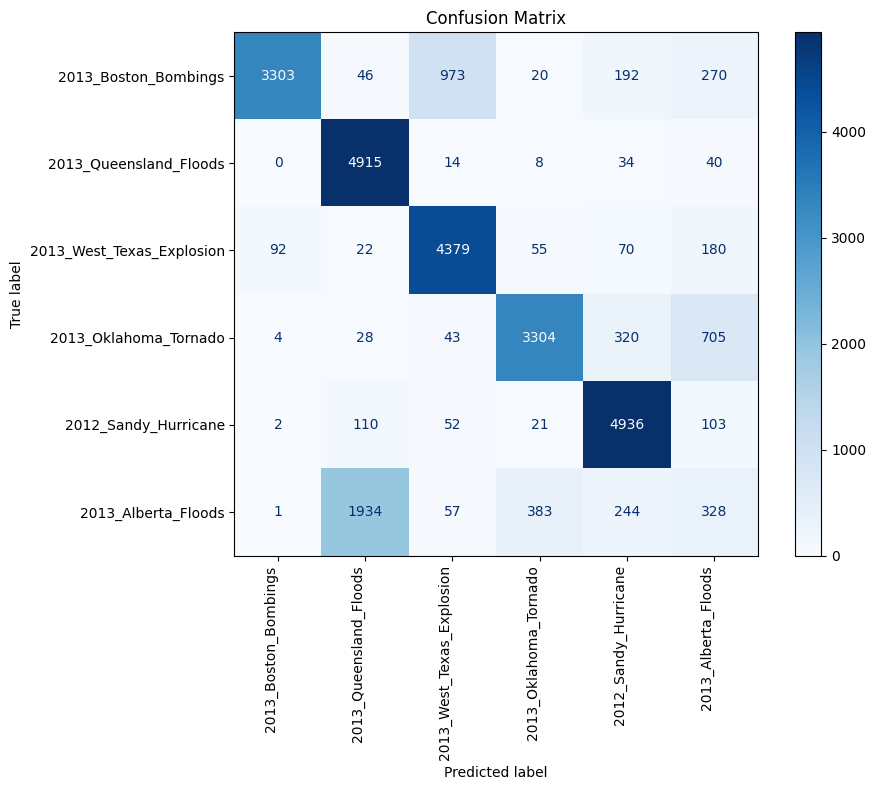

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create confusion matrix
y_true = df_cleaned['label']
y_pred = df_cleaned['predicted_label']

# Get unique labels
labels = list(set(y_true) | set(y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot the confusion matrix with improved readability
fig, ax = plt.subplots(figsize=(10, 8))  # Increase figure size
disp.plot(cmap='Blues', ax=ax)

# Rotate x and y labels for better readability
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)

# Set title and adjust layout
ax.set_title('Confusion Matrix')
fig.tight_layout()

# Show the confusion matrix
plt.show()

In [92]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = df_cleaned['label']
y_pred = df_cleaned['predicted_label']

labels = list(set(y_true))
label_mapping = {label: i for i, label in enumerate(labels)}

y_true_int = [label_mapping[label] for label in y_true]
y_pred_int = [label_mapping[pred] for pred in y_pred]

# Calculate precision, recall, and F1 score
precision = precision_score(y_true_int, y_pred_int, average='macro')
recall = recall_score(y_true_int, y_pred_int, average='macro')
f1 = f1_score(y_true_int, y_pred_int, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7310058017071611
Recall: 0.731243776412708
F1 Score: 0.7190501455695283


In [80]:
display(df)

,tweet,label,detected_topic
0,sandy mad door,2012_Sandy_Hurricane,topic2
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,None
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,topic2
3,already flooded much,2012_Sandy_Hurricane,None
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,topic2
...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,topic1
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,topic6
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,topic1
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,topic1


In [19]:
df1=df

In [20]:
display(df1)

,tweet,label
0,sandy mad door,2012_Sandy_Hurricane
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane
3,already flooded much,2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane
...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1['tweet'])


In [101]:
from sklearn.decomposition import LatentDirichletAllocation

# Define the number of topics
n_topics = 6

# Fit LDA model
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Get topic distribution for each document
topic_distributions = lda.transform(X)


In [113]:
df1=df

In [102]:
import numpy as np

# Assign the topic with the highest probability
df1['detected_topic_lda'] = np.argmax(topic_distributions, axis=1)

# Map topic numbers to topic names
topic_names = {i: f"Topic {i+1}" for i in range(n_topics)}
df1['detected_topic_name_lda'] = df1['detected_topic_lda'].map(topic_names)


In [103]:
display(df1)

,tweet,label,detected_topic,detected_topic_lda,detected_topic_name_lda
0,sandy mad door,2012_Sandy_Hurricane,topic3,1,Topic 2
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,None,3,Topic 4
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,topic3,1,Topic 2
3,already flooded much,2012_Sandy_Hurricane,None,1,Topic 2
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,topic3,0,Topic 1
...,...,...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,topic1,5,Topic 6
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,topic4,0,Topic 1
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,topic1,1,Topic 2
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,topic1,5,Topic 6


In [104]:
import pandas as pd
import numpy as np

# Assume 'vectorizer' is your TF-IDF vectorizer and 'lda' is your LDA model

def get_topic_keywords(lda_model, vectorizer, n_words=10):
    # Get feature names (words) from the vectorizer
    feature_names = vectorizer.get_feature_names_out()
    
    # Get topic-word distributions
    topic_word_matrix = lda_model.components_
    
    # Extract keywords for each topic
    topic_keywords = {}
    for topic_idx, topic in enumerate(topic_word_matrix):
        # Get the indices of the top n_words
        top_word_indices = np.argsort(topic)[::-1][:n_words]
        # Get the corresponding words
        top_words = [feature_names[i] for i in top_word_indices]
        topic_keywords[f"Topic {topic_idx + 1}"] = top_words
    
    return topic_keywords

# Get keywords for each topic
n_keywords = 7
topic_keywords = get_topic_keywords(lda, vectorizer, n_words=n_keywords)

# Print keywords for each topic
for topic, keywords in topic_keywords.items():
    print(f"{topic}: {', '.join(keywords)}")


Topic 1: oklahoma, prayer, thought, affected, go, everyone, boston
Topic 2: hurricane, sandy, im, like, dont, help, get
Topic 3: flood, queensland, crisis, australia, death, alberta, toll
Topic 4: boston, marathon, bombing, suspect, bomb, fbi, explosion
Topic 5: flood, tornado, storm, australia, amazing, woman, oklahoma
Topic 6: explosion, texas, plant, fertilizer, west, waco, video


In [105]:
topic_mapping= {
    "Topic 6": "2013_West_Texas_Explosion",
    "Topic 4": "2013_Boston_Bombings",
    "Topic 2": "2012_Sandy_Hurricane",
    "Topic 3": "2013_Queensland_Floods",
    "Topic 1": "2013_Oklahoma_Tornado",
    "Topic 5": "2013_Alberta_Floods"
}

In [106]:
df1['predicted_label_lda'] = df1['detected_topic_name_lda'].map(topic_mapping)

In [107]:
display(df1)

,tweet,label,detected_topic,detected_topic_lda,detected_topic_name_lda,predicted_label_lda
0,sandy mad door,2012_Sandy_Hurricane,topic3,1,Topic 2,2012_Sandy_Hurricane
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,None,3,Topic 4,2013_Boston_Bombings
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,topic3,1,Topic 2,2012_Sandy_Hurricane
3,already flooded much,2012_Sandy_Hurricane,None,1,Topic 2,2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,topic3,0,Topic 1,2013_Oklahoma_Tornado
...,...,...,...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,topic1,5,Topic 6,2013_West_Texas_Explosion
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,topic4,0,Topic 1,2013_Oklahoma_Tornado
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,topic1,1,Topic 2,2012_Sandy_Hurricane
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,topic1,5,Topic 6,2013_West_Texas_Explosion


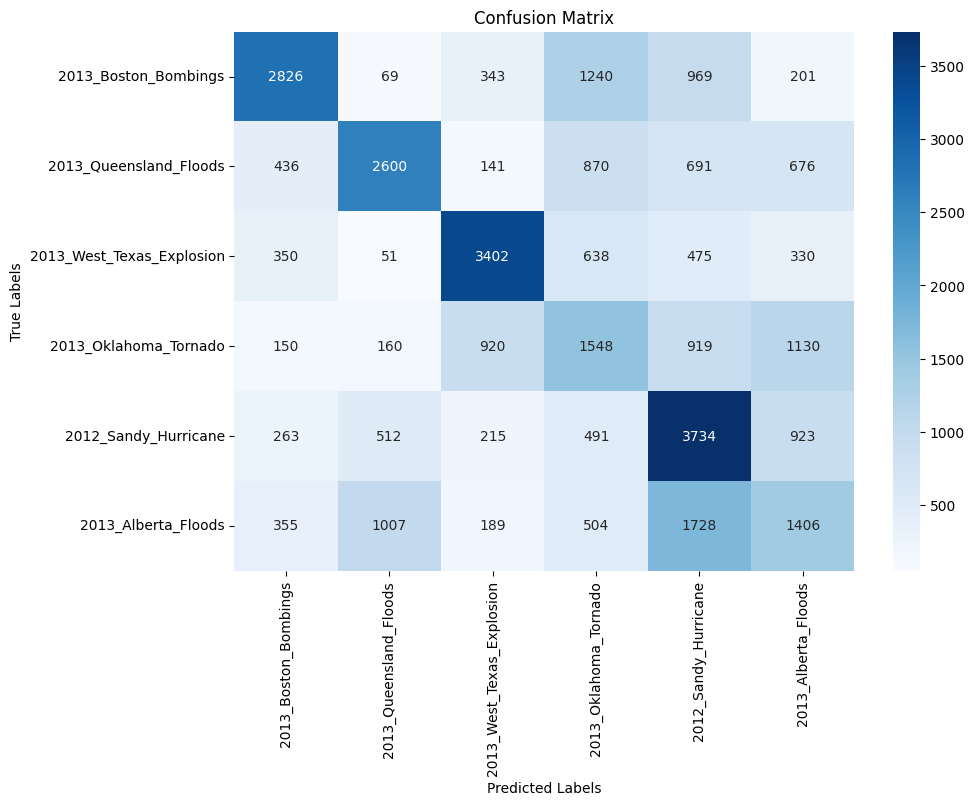

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
y_true = df1['label']
y_pred = df1['predicted_label_lda']

# Get unique labels
labels = list(set(y_true) | set(y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot confusion matrix using seaborn
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()


In [109]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='macro', labels=labels)
recall = recall_score(y_true, y_pred, average='macro', labels=labels)
f1 = f1_score(y_true, y_pred, average='macro', labels=labels)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.4869322941496177
Recall: 0.4715133302733811
F1 Score: 0.4742011137567758


In [22]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1['tweet'])

# Define the number of topics
n_topics = 6

# Fit NMF model
nmf = NMF(n_components=n_topics, random_state=42)
nmf.fit(X)

# Get topic distribution for each document
topic_distributions = nmf.transform(X)

# Assign the topic with the highest probability
df1['detected_topic_nmf'] = np.argmax(topic_distributions, axis=1)

# Map topic numbers to topic names
topic_names = {i: f"Topic {i+1}" for i in range(n_topics)}
df1['detected_topic_name_nmf'] = df1['detected_topic_nmf'].map(topic_names)

# Function to get keywords for each topic
def get_topic_keywords(nmf_model, vectorizer, n_words=10):
    feature_names = vectorizer.get_feature_names_out()
    topic_word_matrix = nmf_model.components_
    topic_keywords = {}
    for topic_idx, topic in enumerate(topic_word_matrix):
        top_word_indices = np.argsort(topic)[::-1][:n_words]
        top_words = [feature_names[i] for i in top_word_indices]
        topic_keywords[f"Topic {topic_idx + 1}"] = top_words
    return topic_keywords

# Get keywords for each topic
n_keywords = 7
topic_keywords = get_topic_keywords(nmf, vectorizer, n_words=n_keywords)

# Print keywords for each topic
for topic, keywords in topic_keywords.items():
    print(f"{topic}: {', '.join(keywords)}")



Topic 1: explosion, texas, plant, fertilizer, west, waco, video
Topic 2: flood, queensland, australia, rise, water, crisis, photo
Topic 3: oklahoma, prayer, tornado, thought, go, affected, everyone
Topic 4: boston, marathon, bombing, suspect, fbi, bomb, victim
Topic 5: hurricane, sandy, im, like, name, safe, everyone
Topic 6: baby, led, stuffed, hoisted, powerful, bag, storm


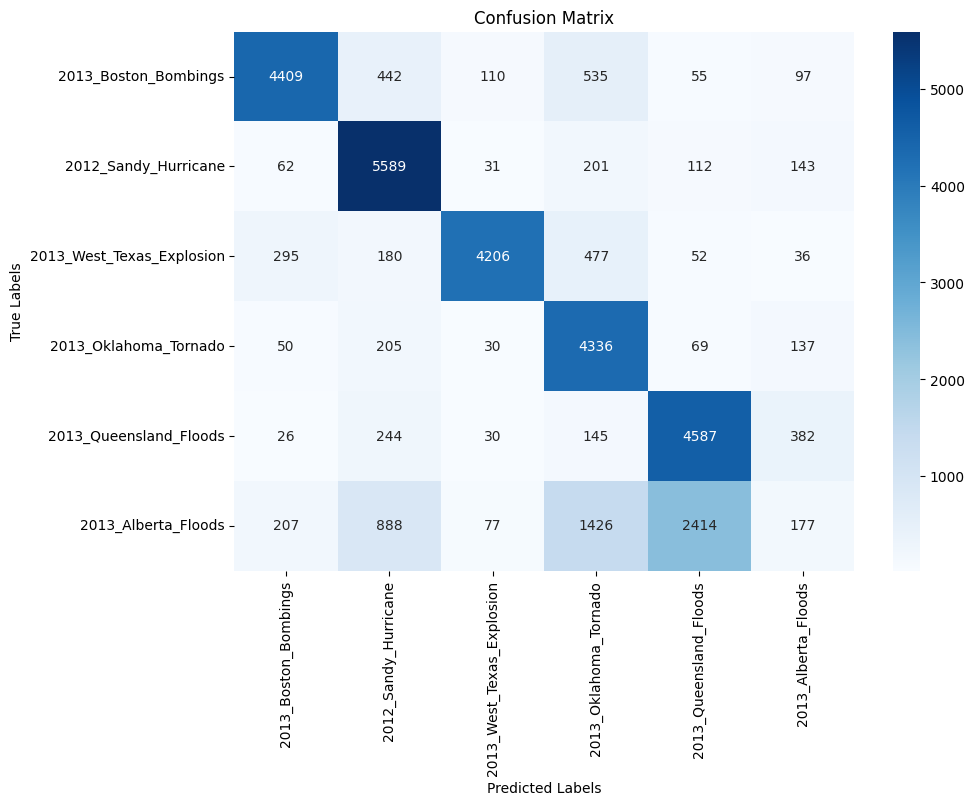

Precision: 0.6620161700668721
Recall: 0.7120967022444799
F1 Score: 0.6685258972165135


In [23]:
# Mapping of detected topics to specific event labels
topic_mapping = {
    "Topic 1": "2013_West_Texas_Explosion",
    "Topic 4": "2013_Boston_Bombings",
    "Topic 5": "2012_Sandy_Hurricane",
    "Topic 2": "2013_Queensland_Floods",
    "Topic 3": "2013_Oklahoma_Tornado",
    "Topic 6": "2013_Alberta_Floods"
}
df1['predicted_label_nmf'] = df1['detected_topic_name_nmf'].map(topic_mapping)

# Create confusion matrix
y_true = df1['label']
y_pred = df1['predicted_label_nmf']
labels = list(set(y_true) | set(y_pred))
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot confusion matrix using seaborn
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='macro', labels=labels)
recall = recall_score(y_true, y_pred, average='macro', labels=labels)
f1 = f1_score(y_true, y_pred, average='macro', labels=labels)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [24]:
!pip install cupy-cuda11x scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.4/95.4 MB 17.3 MB/s eta 0:00:00:00:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.6.1 requires cubinlinker, which is not installed.
cudf 24.6.1 requires ptxcompiler, which is not installed.
cudf 24.6.1 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.5.0 which is incompatible.


In [26]:
df1=df

In [27]:
import pandas as pd
import numpy as np
import cupy as cp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1['tweet'])

# Convert to GPU array
X_gpu = cp.asarray(X.toarray())

# Define the number of clusters
n_clusters = 6

# Fit K-Means model using GPU
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_gpu)

# Assign the cluster with the highest probability
df1['detected_cluster_kmeans'] = kmeans.predict(X_gpu)

# Map cluster numbers to cluster names
cluster_names = {i: f"Cluster {i+1}" for i in range(n_clusters)}
df1['detected_cluster_name_kmeans'] = df1['detected_cluster_kmeans'].map(cluster_names)

# Function to get keywords for each cluster
def get_cluster_keywords(kmeans_model, vectorizer, n_words=10):
    cluster_centers = kmeans_model.cluster_centers_
    feature_names = vectorizer.get_feature_names_out()
    cluster_keywords = {}
    for cluster_idx, cluster in enumerate(cluster_centers):
        top_word_indices = np.argsort(cluster)[::-1][:n_words]
        top_words = [feature_names[i] for i in top_word_indices]
        cluster_keywords[f"Cluster {cluster_idx + 1}"] = top_words
    return cluster_keywords

# Get keywords for each cluster
n_keywords = 7
cluster_keywords = get_cluster_keywords(kmeans, vectorizer, n_words=n_keywords)

# Print keywords for each cluster
for cluster, keywords in cluster_keywords.items():
    print(f"{cluster}: {', '.join(keywords)}")


/opt/conda/lib/python3.10/site-packages/cupy/_environment.py:487: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda11x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


TypeError: Implicit conversion to a NumPy array is not allowed. Please use `.get()` to construct a NumPy array explicitly.

In [31]:
df1=df

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df1 = pd.read_csv('your_dataset.csv')

# Preprocess the text data
def preprocess_text(text):
    # Implement your text preprocessing here
    return text.lower()

df1['processed_tweet'] = df1['tweet'].apply(preprocess_text)

# Tokenization and padding
max_words = 3000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df1['processed_tweet'])
sequences = tokenizer.texts_to_sequences(df1['processed_tweet'])
X = pad_sequences(sequences, maxlen=max_len)

# Define a more complex CNN model
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=max_words, output_dim=128, input_length=max_len)(input_layer)

# Adding multiple convolutional layers with different kernel sizes
conv_layer1 = Conv1D(filters=128, kernel_size=3, activation='relu')(embedding_layer)
conv_layer2 = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
conv_layer3 = Conv1D(filters=128, kernel_size=7, activation='relu')(embedding_layer)

# Pooling layers
pooling_layer1 = GlobalMaxPooling1D()(conv_layer1)
pooling_layer2 = GlobalMaxPooling1D()(conv_layer2)
pooling_layer3 = GlobalMaxPooling1D()(conv_layer3)

# Concatenate the pooled features
concatenated = tf.keras.layers.concatenate([pooling_layer1, pooling_layer2, pooling_layer3])

# Dense layer for the embeddings
dense_layer = Dense(max_len, activation='sigmoid')(concatenated)  # Match the output shape to max_len
embedding_model = Model(inputs=input_layer, outputs=dense_layer)

# Compile and train the model
embedding_model.compile(optimizer='adam', loss='binary_crossentropy')  # Use 'binary_crossentropy' for sigmoid output
embedding_model.fit(X, X, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

# Extract embeddings
embeddings = embedding_model.predict(X)

# Perform K-Means clustering
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(embeddings)
df1['detected_cluster'] = kmeans.predict(embeddings)

# Map cluster numbers to cluster names
cluster_names = {i: f"Cluster {i+1}" for i in range(n_clusters)}
df1['detected_cluster_name'] = df1['detected_cluster'].map(cluster_names)

# Print cluster distribution for each document
print(df1[['tweet', 'detected_cluster_name']].head())


Epoch 1/5
 36/406 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: -513.9462

I0000 00:00:1722246912.426025     125 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


406/406 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: -4377084.0000 - val_loss: -67825848.0000
Epoch 2/5
406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: -182824560.0000 - val_loss: -566352960.0000
Epoch 3/5
406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: -984387392.0000 - val_loss: -1822294272.0000
Epoch 4/5
406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: -2794717440.0000 - val_loss: -4028165632.0000
Epoch 5/5
406/406 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: -5807608320.0000 - val_loss: -7337472512.0000
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                               tweet detected_cluster_name
0                                     sandy mad door             Cluster 1
1       duty arrives rescue sporting equipment squad             Cluster 1
2  dont know im getting back jersey since train s...             Cluster 1
3                               already flooded much             Cluster 1
4         note pray everyone stay safe keep positive             Cluster 1


/tmp/ipykernel_34/4025185077.py:63: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(embeddings)


In [110]:
!pip install git+https://github.com/rwalk/gsdmm.git


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Cloning https://github.com/rwalk/gsdmm.git to /tmp/pip-req-build-yndlbou9
  Running command git clone --filter=blob:none --quiet https://github.com/rwalk/gsdmm.git /tmp/pip-req-build-yndlbou9
  Resolved https://github.com/rwalk/gsdmm.git to commit 4ad1b6b6976743681ee4976b4573463d359214ee
  Preparing metadata (setup.py) ... done
  Created wheel for gsdmm: filename=gsdmm-0.1-py3-none-any.whl size=4587 sha256=a14392371ea9222356cc4eb8cddb15f56eb990c71fda675ff4532158c10589d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-eh6majvq/wheels/da/d3/6e/a612d7cff0fcfb6470b8c113fc04931ecffb466ac19b9c5f3c
Successfully built gsdmm


In [111]:
import pandas as pd
from gsdmm import MovieGroupProcess


docs = df['tweet'].tolist()


K = 6 
alpha = 0.1 
beta = 0.1 
n_iters = 30

mgp = MovieGroupProcess(K=K, alpha=alpha, beta=beta, n_iters=n_iters)

# Fit GSDMM model
vocab = set(word for tweet in df['tweet'] for word in tweet.split())
n_terms = len(vocab)
mgp.fit([tweet.split() for tweet in docs], n_terms)

# Assign topics to tweets
df['predicted_topic_gsdmm'] = [mgp.choose_best_label(tweet.split())[0] for tweet in docs]


In stage 0: transferred 25542 clusters with 6 clusters populated
In stage 1: transferred 16609 clusters with 6 clusters populated
In stage 2: transferred 9496 clusters with 6 clusters populated
In stage 3: transferred 6179 clusters with 6 clusters populated
In stage 4: transferred 4871 clusters with 6 clusters populated
In stage 5: transferred 4040 clusters with 6 clusters populated
In stage 6: transferred 3633 clusters with 6 clusters populated
In stage 7: transferred 3222 clusters with 6 clusters populated
In stage 8: transferred 2899 clusters with 6 clusters populated
In stage 9: transferred 2753 clusters with 6 clusters populated
In stage 10: transferred 2665 clusters with 6 clusters populated
In stage 11: transferred 2612 clusters with 6 clusters populated
In stage 12: transferred 2525 clusters with 6 clusters populated
In stage 13: transferred 2520 clusters with 6 clusters populated
In stage 14: transferred 2512 clusters with 6 clusters populated
In stage 15: transferred 2515 clu

In [112]:
display(df)

,tweet,label,detected_topic,detected_topic_lda,detected_topic_name_lda,predicted_label_lda,predicted_topic_gsdmm
0,sandy mad door,2012_Sandy_Hurricane,topic3,1,Topic 2,2012_Sandy_Hurricane,3
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,None,3,Topic 4,2013_Boston_Bombings,1
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,topic3,1,Topic 2,2012_Sandy_Hurricane,3
3,already flooded much,2012_Sandy_Hurricane,None,1,Topic 2,2012_Sandy_Hurricane,3
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,topic3,0,Topic 1,2013_Oklahoma_Tornado,3
...,...,...,...,...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,topic1,5,Topic 6,2013_West_Texas_Explosion,2
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,topic4,0,Topic 1,2013_Oklahoma_Tornado,5
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,topic1,1,Topic 2,2012_Sandy_Hurricane,3
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,topic1,5,Topic 6,2013_West_Texas_Explosion,2


In [113]:
# Get top words for each topic
def get_top_words(cluster_word_distribution, top_n=7):
    top_words = {}
    for topic in range(K):
        sorted_words = sorted(cluster_word_distribution[topic].items(), key=lambda x: x[1], reverse=True)
        top_words[topic] = [word for word, freq in sorted_words[:top_n]]
    return top_words

top_words_per_topic = get_top_words(mgp.cluster_word_distribution, top_n=7)
for topic, words in top_words_per_topic.items():
    print(f"Topic {topic}: {words}")


Topic 0: ['flood', 'queensland', 'australia', 'crisis', 'rise', 'water', 'toll']
Topic 1: ['flood', 'help', 'calgary', 'tornado', 'oklahoma', 'alberta', 'relief']
Topic 2: ['explosion', 'texas', 'plant', 'fertilizer', 'west', 'waco', 'video']
Topic 3: ['hurricane', 'sandy', 'im', 'like', 'people', 'u', 'get']
Topic 4: ['oklahoma', 'tornado', 'prayer', 'affected', 'thought', 'flood', 'go']
Topic 5: ['boston', 'marathon', 'bombing', 'suspect', 'explosion', 'bomb', 'texas']


In [114]:
df['predicted_topic_gsdmm'] = [mgp.choose_best_label(tweet.split())[0] for tweet in docs]

# Now, let's see the predicted topics before mapping
display(df)


,tweet,label,detected_topic,detected_topic_lda,detected_topic_name_lda,predicted_label_lda,predicted_topic_gsdmm
0,sandy mad door,2012_Sandy_Hurricane,topic3,1,Topic 2,2012_Sandy_Hurricane,3
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,None,3,Topic 4,2013_Boston_Bombings,1
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,topic3,1,Topic 2,2012_Sandy_Hurricane,3
3,already flooded much,2012_Sandy_Hurricane,None,1,Topic 2,2012_Sandy_Hurricane,3
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,topic3,0,Topic 1,2013_Oklahoma_Tornado,3
...,...,...,...,...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,topic1,5,Topic 6,2013_West_Texas_Explosion,2
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,topic4,0,Topic 1,2013_Oklahoma_Tornado,5
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,topic1,1,Topic 2,2012_Sandy_Hurricane,3
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,topic1,5,Topic 6,2013_West_Texas_Explosion,2


In [115]:
# Example topic mapping (you need to create this based on your analysis)
topic_mapping = {
    1: '2013_Alberta_Floods',
    4: '2013_Oklahoma_Tornado',
    5: '2013_Boston_Bombings',
    2: '2013_West_Texas_Explosion',
    3: '2012_Sandy_Hurricane',
    0: '2013_Queensland_Floods'
    
}

# Map predicted topics to detected topics
df['predicted_label_gsdmm'] = df['predicted_topic_gsdmm'].map(topic_mapping)
display(df)

,tweet,label,detected_topic,detected_topic_lda,detected_topic_name_lda,predicted_label_lda,predicted_topic_gsdmm,predicted_label_gsdmm
0,sandy mad door,2012_Sandy_Hurricane,topic3,1,Topic 2,2012_Sandy_Hurricane,3,2012_Sandy_Hurricane
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,None,3,Topic 4,2013_Boston_Bombings,1,2013_Alberta_Floods
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,topic3,1,Topic 2,2012_Sandy_Hurricane,3,2012_Sandy_Hurricane
3,already flooded much,2012_Sandy_Hurricane,None,1,Topic 2,2012_Sandy_Hurricane,3,2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,topic3,0,Topic 1,2013_Oklahoma_Tornado,3,2012_Sandy_Hurricane
...,...,...,...,...,...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,topic1,5,Topic 6,2013_West_Texas_Explosion,2,2013_West_Texas_Explosion
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,topic4,0,Topic 1,2013_Oklahoma_Tornado,5,2013_Boston_Bombings
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,topic1,1,Topic 2,2012_Sandy_Hurricane,3,2012_Sandy_Hurricane
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,topic1,5,Topic 6,2013_West_Texas_Explosion,2,2013_West_Texas_Explosion


In [116]:
df_cleaned = df.dropna(subset=['predicted_label_gsdmm'])


In [117]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# True labels and predicted labels
y_true = df_cleaned['label']
y_pred = df_cleaned['predicted_label_gsdmm']

# Get unique labels
labels = list(set(y_true) | set(y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='macro', labels=labels, zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', labels=labels, zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', labels=labels, zero_division=0)

print("Confusion Matrix:")
print(cm)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[4088    2   33  548  810  167]
 [  73 2978  269  571  577  946]
 [ 486    6 3514  543  349  348]
 [  28   17   16 2340  706 1720]
 [   8    3    6   88 5655  378]
 [  48  140   28  239  752 3982]]
Precision: 0.7378798474125764
Recall: 0.6861951202426017
F1 Score: 0.6910387583155876


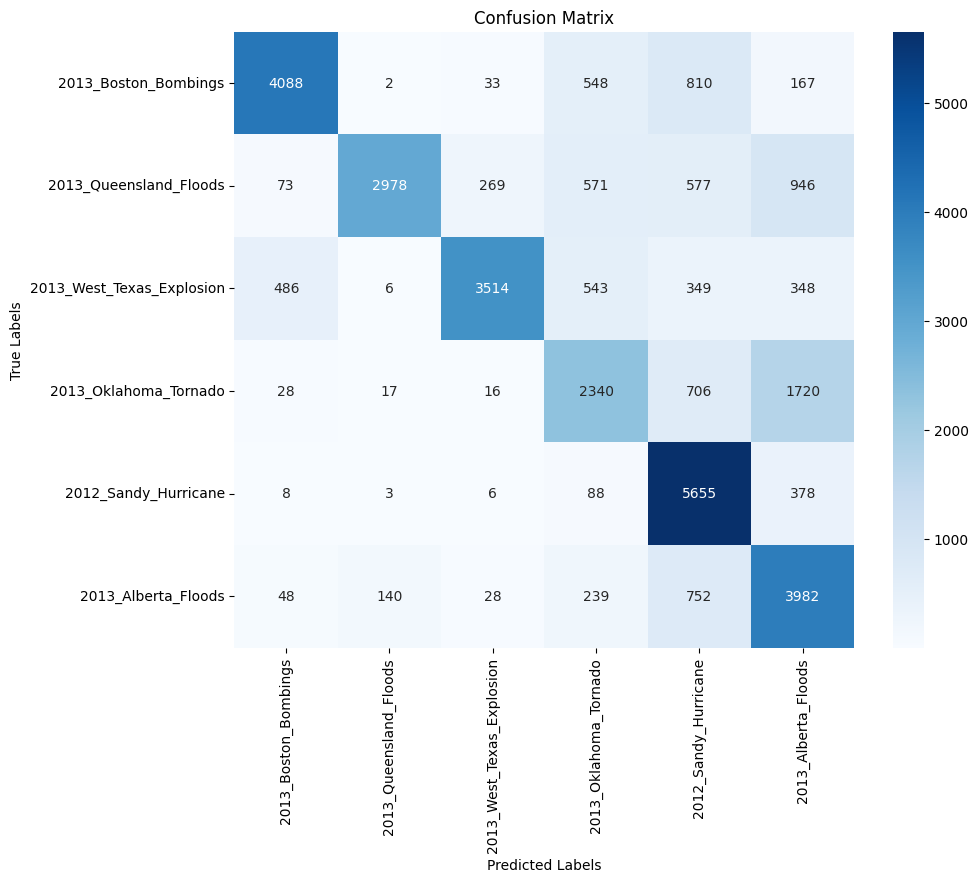

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix using seaborn
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()


In [47]:
!pip install biterm


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for biterm: filename=biterm-0.1.5-cp310-cp310-linux_x86_64.whl size=71339 sha256=b6cb30958bcd12c2c4bf4fa6914a47e04bde749fc9f105c935ee2a86daceeb3e
  Stored in directory: /root/.cache/pip/wheels/d9/6e/b8/b89e5a843baa692331b6c3db8d5f5ea43607ccad34426eebb4
Successfully built biterm


In [48]:
display(df)

,tweet,label,predicted_topic_gsdmm,predicted_label_gsdmm
0,sandy mad door,2012_Sandy_Hurricane,4,2012_Sandy_Hurricane
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,4,2012_Sandy_Hurricane
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,4,2012_Sandy_Hurricane
3,already flooded much,2012_Sandy_Hurricane,0,2013_Alberta_Floods
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,4,2012_Sandy_Hurricane
...,...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,3,2013_West_Texas_Explosion
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,3,2013_West_Texas_Explosion
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,4,2012_Sandy_Hurricane
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,3,2013_West_Texas_Explosion


In [49]:
df=df.drop(columns=["predicted_topic_gsdmm","predicted_label_gsdmm"])

In [50]:
display(df)

,tweet,label
0,sandy mad door,2012_Sandy_Hurricane
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane
3,already flooded much,2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane
...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion


In [53]:
import pandas as pd
from biterm.utility import vec_to_biterms, topic_summuary
from biterm.btm import oBTM
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Assuming df is your preprocessed DataFrame with 'tweet' and 'label' columns
docs = df['tweet'].tolist()

# Vectorize the documents
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(docs).toarray()
vocab = np.array(vectorizer.get_feature_names_out())
biterms = vec_to_biterms(X)

# Define BTM model
btm = oBTM(num_topics=6, V=vocab)

# Fit BTM model
btm.fit(biterms, iterations=20)

# Assign topics to tweets
topic_assignments = btm.transform(biterms)
df['predicted_topic_btm'] = [topics.argmax() for topics in topic_assignments]

# Print the first few rows to see the assigned topics
print(df[['tweet', 'predicted_topic_btm']].head())


100%|██████████| 20/20 [1:00:54<00:00, 182.75s/it]
/opt/conda/lib/python3.10/site-packages/biterm/btm.py:76: RuntimeWarning: invalid value encountered in divide
  P_zd[i] = P_zb.sum(axis=0) / P_zb.sum(axis=0).sum()


                                               tweet  predicted_topic_btm
0                                     sandy mad door                    5
1       duty arrives rescue sporting equipment squad                    1
2  dont know im getting back jersey since train s...                    5
3                               already flooded much                    0
4         note pray everyone stay safe keep positive                    5


In [60]:
display(df)

,tweet,label,predicted_topic_btm
0,sandy mad door,2012_Sandy_Hurricane,5
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,1
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,5
3,already flooded much,2012_Sandy_Hurricane,0
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,5
...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,3
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,3
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,5
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,3


In [59]:
# Get the topic weights (word importance for each topic)
topic_weights = btm.get_topics()

# Get the vocabulary (list of words)
vocab = np.array(vectorizer.get_feature_names_out())

# Define a function to get top n keywords for a topic
def get_top_n_words(topic_weights, vocab, n=10):
  """
  This function takes a topic weight matrix, vocabulary list, and number of top words
  and returns a list of top n words for that topic.
  """
  top_n_indices = topic_weights.argsort()[-n:]  # Get indices of top n weights (descending order)
  return vocab[top_n_indices[::-1]]  # Get words from vocabulary based on sorted indices (ascending order)

# Get top 10 keywords for each topic
top_words_per_topic = [get_top_n_words(topic, vocab) for topic in topic_weights]

# Print the top 10 words for each topic
for topic_idx, topic_words in enumerate(top_words_per_topic):
  print(f"Topic {topic_idx+1}: {', '.join(topic_words)}")


AttributeError: 'oBTM' object has no attribute 'get_topics'

In [73]:
df1=df[df["label"]=="2013_Boston_Bombings"]
df1["predicted_topic_btm"].value_counts()

predicted_topic_btm
3    3913
5     836
1     468
2     364
0      59
4       8
Name: count, dtype: int64

In [ ]:
# Example topic mapping (you need to create this based on your analysis)
topic_mapping = {
    0: 'Topic 1',
    1: '2013_Alberta_Floods',
    2: '',
    3: '2013_West_Texas_Explosion',
    4: '',
    5: '2012_Sandy_Hurricane'
}

# Map predicted topics to detected topics
df['predicted_label_btm'] = df['predicted_topic_btm'].map(topic_mapping)


In [71]:
df["label"].unique()

array(['2012_Sandy_Hurricane', '2013_Alberta_Floods',
       '2013_Boston_Bombings', '2013_Oklahoma_Tornado',
       '2013_Queensland_Floods', '2013_West_Texas_Explosion'],
      dtype=object)

In [74]:
display(df)

,tweet,label,predicted_topic_btm
0,sandy mad door,2012_Sandy_Hurricane,5
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,1
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,5
3,already flooded much,2012_Sandy_Hurricane,0
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,5
...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,3
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,3
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,5
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,3


In [77]:
df=df.drop(columns=["predicted_topic_btm"])

In [78]:
display(df)

,tweet,label
0,sandy mad door,2012_Sandy_Hurricane
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane
3,already flooded much,2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane
...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion


In [83]:
!pip install pytextrank

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [90]:
!pip install --upgrade optuna


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [92]:
import optuna

# Check if 'study' attribute is accessible
print(dir(optuna))

AttributeError: partially initialized module 'optuna' has no attribute 'study' (most likely due to a circular import)

In [91]:
import pandas as pd
# import optuna
import pytextrank
# from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt


AttributeError: partially initialized module 'optuna' has no attribute 'study' (most likely due to a circular import)

In [94]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [95]:
# Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
X = vectorizer.fit_transform(df['tweet'])


In [96]:
# Number of topics
n_topics = 6

# Initialize the LSA model
lsa = TruncatedSVD(n_components=n_topics, random_state=42)

# Fit and transform the data
X_lsa = lsa.fit_transform(X)

# Normalize the results
normalizer = Normalizer(copy=False)
X_lsa = normalizer.fit_transform(X_lsa)


In [97]:
from sklearn.cluster import KMeans

# Initialize KMeans clustering
kmeans = KMeans(n_clusters=n_topics, random_state=42)

# Fit the model and predict clusters
clusters = kmeans.fit_predict(X_lsa)

# Map cluster labels to topics
df['predicted_topic'] = clusters


In [98]:
display(df)

,tweet,label,predicted_topic
0,sandy mad door,2012_Sandy_Hurricane,4
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,0
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,4
3,already flooded much,2012_Sandy_Hurricane,3
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,1
...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,2
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,5
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,2
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,2


In [100]:
import numpy as np

# Function to get top keywords for each topic
def get_top_keywords_lsa(lsa_model, vectorizer, num_words=7):
    # Get the feature names (words)
    feature_names = np.array(vectorizer.get_feature_names_out())
    
    # Get the components (topics) of the LSA model
    components = lsa_model.components_
    
    # Get top words for each topic
    top_keywords = {}
    for i, topic in enumerate(components):
        # Get indices of top words
        top_indices = topic.argsort()[-num_words:][::-1]
        # Map indices to words
        top_words = feature_names[top_indices]
        top_keywords[f"Topic {i}"] = top_words.tolist()
    
    return top_keywords

# Get the top keywords for each topic
top_keywords_lsa = get_top_keywords_lsa(lsa, vectorizer, num_words=7)

# Print the top keywords for each topic
for topic, keywords in top_keywords_lsa.items():
    print(f"{topic}: {keywords}")


Topic 0: ['explosion', 'texas', 'plant', 'fertilizer', 'west', 'boston', 'waco']
Topic 1: ['flood', 'australia', 'queensland', 'rise', 'water', 'crisis', 'photo']
Topic 2: ['hurricane', 'oklahoma', 'sandy', 'prayer', 'boston', 'tornado', 'thought']
Topic 3: ['boston', 'marathon', 'bombing', 'suspect', 'fbi', 'victim', 'bomb']
Topic 4: ['oklahoma', 'prayer', 'tornado', 'thought', 'affected', 'heart', 'victim']
Topic 5: ['australia', 'baby', 'led', 'stuffed', 'hoisted', 'powerful', 'bag']


In [103]:
topic_mapping = {
    0: "2013_West_Texas_Explosion",
    1: "2013_Queensland_Floods",
    2: "2012_Sandy_Hurricane",
    3: "2013_Boston_Bombings",
    4: "2013_Oklahoma_Tornado",
    5: "2013_Alberta_Floods"
}

In [102]:
df["label"].unique()

array(['2012_Sandy_Hurricane', '2013_Alberta_Floods',
       '2013_Boston_Bombings', '2013_Oklahoma_Tornado',
       '2013_Queensland_Floods', '2013_West_Texas_Explosion'],
      dtype=object)

In [105]:
display(df)

,tweet,label,predicted_topic,predicted_label_lsa
0,sandy mad door,2012_Sandy_Hurricane,4,2013_Oklahoma_Tornado
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,0,2013_West_Texas_Explosion
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,4,2013_Oklahoma_Tornado
3,already flooded much,2012_Sandy_Hurricane,3,2013_Boston_Bombings
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,1,2013_Queensland_Floods
...,...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,2,2012_Sandy_Hurricane
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,5,2013_Alberta_Floods
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,2,2012_Sandy_Hurricane
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,2,2012_Sandy_Hurricane


Confusion Matrix:
[[  37  110 5585   37  187  182]
 [ 137   55  380 4424   56  596]
 [  33   64  141   21   92 4476]
 [  98 2183  755  167  567 1419]
 [4390   38  156  220   31  411]
 [  18 3359  224   16 1704   93]]
Precision: 0.01594854489672237
Recall: 0.016707848177808685
F1 Score: 0.015930081157143564


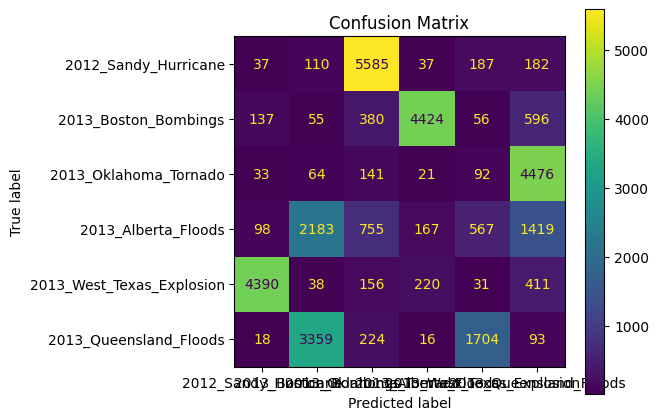

In [104]:
df['predicted_label_lsa'] = df['predicted_topic'].map(topic_mapping)

# Create confusion matrix
y_true = df['label']
y_pred = df['predicted_label_lsa']

# Get unique labels
labels = list(set(y_true) | set(y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='macro', labels=labels, zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', labels=labels, zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', labels=labels, zero_division=0)

print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='viridis')
disp.ax_.set_title('Confusion Matrix')
disp.figure_.tight_layout()
plt.show()

In [106]:
!pip install summa


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54388 sha256=067b3c41f6a9e1d0ca90e06a1e75e0f7656722d9f91cfbd3ea21523a584792de
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [108]:
import pandas as pd
from summa import keywords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np


In [109]:
def extract_keywords_textrank(text, num_keywords=7):
    return keywords.keywords(text, ratio=0.1).split('\n')[:num_keywords]

# Apply TextRank to each tweet
df['keywords_textrank'] = df['tweet'].apply(lambda x: extract_keywords_textrank(x, num_keywords=7))


In [111]:
display(df.head(20))

,tweet,label,predicted_topic,predicted_label_lsa,keywords_textrank
0,sandy mad door,2012_Sandy_Hurricane,4,2013_Oklahoma_Tornado,[]
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,0,2013_West_Texas_Explosion,[]
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,4,2013_Oklahoma_Tornado,[]
3,already flooded much,2012_Sandy_Hurricane,3,2013_Boston_Bombings,[]
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,1,2013_Queensland_Floods,[]
5,house mean shes trying break,2012_Sandy_Hurricane,4,2013_Oklahoma_Tornado,[]
6,going home prep,2012_Sandy_Hurricane,1,2013_Queensland_Floods,[]
7,going chance rain,2012_Sandy_Hurricane,4,2013_Oklahoma_Tornado,[]
8,block water first two block evacuated sound li...,2012_Sandy_Hurricane,0,2013_West_Texas_Explosion,[block]
9,crazy gon na lie im kind scared,2012_Sandy_Hurricane,4,2013_Oklahoma_Tornado,[]


In [112]:
# Convert the tweet texts to a document-term matrix
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['tweet'])


In [113]:
# Apply NMF for topic modeling
num_topics = 6  # Number of topics
nmf = NMF(n_components=num_topics, random_state=1)
W = nmf.fit_transform(X)
H = nmf.components_


In [114]:
def get_top_keywords_nmf(nmf_model, vectorizer, num_words=7):
    feature_names = np.array(vectorizer.get_feature_names_out())
    top_keywords = {}
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_indices = topic.argsort()[-num_words:][::-1]
        top_words = feature_names[top_indices]
        top_keywords[f"Topic {topic_idx}"] = top_words.tolist()
    return top_keywords

top_keywords_nmf = get_top_keywords_nmf(nmf, vectorizer, num_words=7)


In [120]:
df=df.drop(columns=["predicted_topic","predicted_label_lsa"])

KeyError: "['predicted_topic', 'predicted_label_lsa'] not found in axis"

In [121]:
import pandas as pd
from summa import keywords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np


# Extract keywords using TextRank
def extract_keywords_textrank(text, num_keywords=7):
    return keywords.keywords(text, ratio=0.1).split('\n')[:num_keywords]

df['keywords_textrank'] = df['tweet'].apply(lambda x: extract_keywords_textrank(x, num_keywords=7))

# Create document-term matrix
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['tweet'])

# Apply NMF for topic modeling
num_topics = 6
nmf = NMF(n_components=num_topics, random_state=1)
W = nmf.fit_transform(X)
H = nmf.components_

# Get top keywords for each topic
def get_top_keywords_nmf(nmf_model, vectorizer, num_words=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    top_keywords = {}
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_indices = topic.argsort()[-num_words:][::-1]
        top_words = feature_names[top_indices]
        top_keywords[f"Topic {topic_idx}"] = top_words.tolist()
    return top_keywords

top_keywords_nmf = get_top_keywords_nmf(nmf, vectorizer, num_words=10)

# Assign the most probable topic to each tweet
df['topic'] = np.argmax(W, axis=1)

# Display results
print("Top Keywords for Each Topic:")
for topic, keywords in top_keywords_nmf.items():
    print(f"{topic}: {keywords}")





Top Keywords for Each Topic:
Topic 0: ['explosion', 'texas', 'plant', 'fertilizer', 'west', 'waco', 'video', 'near', 'injured', 'dead']
Topic 1: ['flood', 'queensland', 'australia', 'rise', 'water', 'crisis', 'photo', 'toll', 'death', 'australian']
Topic 2: ['hurricane', 'sandy', 'im', 'like', 'safe', 'hope', 'coast', 'stay', 'new', 'east']
Topic 3: ['boston', 'marathon', 'bombing', 'suspect', 'fbi', 'victim', 'bomb', 'photo', 'breaking', 'police']
Topic 4: ['oklahoma', 'prayer', 'tornado', 'thought', 'affected', 'victim', 'people', 'help', 'heart', 'praying']
Topic 5: ['baby', 'led', 'hoisted', 'stuffed', 'storm', 'powerful', 'bag', 'amazing', 'rescue', 'woman']


In [122]:
display(df)

,tweet,label,keywords_textrank,topic
0,sandy mad door,2012_Sandy_Hurricane,[],2
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,[],5
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,[],2
3,already flooded much,2012_Sandy_Hurricane,[],1
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,[],4
...,...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,[],0
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,[],3
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,[],0
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,[texas],0


In [125]:
topic_mapping = {
    0: '2013_West_Texas_Explosion',
    1: '2013_Queensland_Floods',
    2: '2012_Sandy_Hurricane',
    3: '2013_Boston_Bombings',
    4: '2013_Oklahoma_Tornado',
    5: '2013_Alberta_Floods',
    
}

In [127]:
df['mapped_label'] = df['topic'].map(topic_mapping)

In [128]:
display(df)

,tweet,label,keywords_textrank,topic,mapped_label
0,sandy mad door,2012_Sandy_Hurricane,[],2,2012_Sandy_Hurricane
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,[],5,2013_Alberta_Floods
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,[],2,2012_Sandy_Hurricane
3,already flooded much,2012_Sandy_Hurricane,[],1,2013_Queensland_Floods
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,[],4,2013_Oklahoma_Tornado
...,...,...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,[],0,2013_West_Texas_Explosion
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,[],3,2013_Boston_Bombings
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,[],0,2013_West_Texas_Explosion
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,[texas],0,2013_West_Texas_Explosion


In [129]:
df_cleaned = df[df['mapped_label'].notna()]
display(df_cleaned)

,tweet,label,keywords_textrank,topic,mapped_label
0,sandy mad door,2012_Sandy_Hurricane,[],2,2012_Sandy_Hurricane
1,duty arrives rescue sporting equipment squad,2012_Sandy_Hurricane,[],5,2013_Alberta_Floods
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,[],2,2012_Sandy_Hurricane
3,already flooded much,2012_Sandy_Hurricane,[],1,2013_Queensland_Floods
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,[],4,2013_Oklahoma_Tornado
...,...,...,...,...,...
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,[],0,2013_West_Texas_Explosion
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,[],3,2013_Boston_Bombings
32459,prayed knocked foot explosion cant go back hom...,2013_West_Texas_Explosion,[],0,2013_West_Texas_Explosion
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,[texas],0,2013_West_Texas_Explosion


In [130]:
# True labels and mapped predicted labels
y_true = df_cleaned['label']
y_pred = df_cleaned['mapped_label']

# Get unique labels
labels = list(set(y_true) | set(y_pred))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='macro', labels=labels, zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', labels=labels, zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', labels=labels, zero_division=0)

print("Confusion Matrix:")
print(cm)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[5528   65  231  138   42  134]
 [ 320 4529  615   23  114   47]
 [ 114   46 4470  113   25   59]
 [ 655  271 1567  147   93 2456]
 [ 115  326  562   33 4174   36]
 [ 207   24  160  397   32 4594]]
Precision: 0.6628011244540556
Recall: 0.7168434488988228
F1 Score: 0.6705126509130676


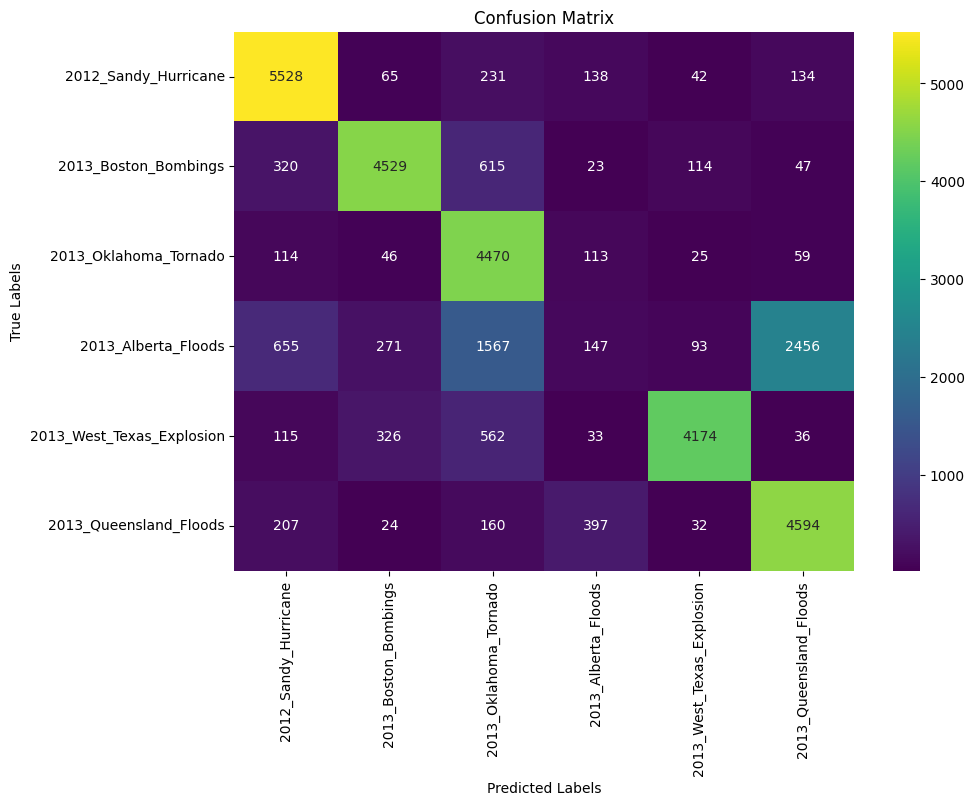

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix using seaborn
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels, ax=ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

Text rank

In [20]:
!pip install pytextrank spacy pandas
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [23]:
import pandas as pd
import spacy
import pytextrank
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('textrank')

/opt/conda/lib/python3.10/site-packages


In [67]:
import pandas as pd
import spacy
import pytextrank
from collections import defaultdict, Counter

# Load Spacy model and add TextRank pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('textrank')

# Function to extract single-word phrases
def extract_single_word_phrases(text):
    doc = nlp(text)
    single_word_phrases = []
    for phrase in doc._.phrases:
        if len(phrase.text.split()) == 1:
            single_word_phrases.append(phrase.text)
    return single_word_phrases

# Assuming df is already loaded with columns 'tweet' and 'label'
# Extract single-word phrases and add them to a new column
df['keywords'] = df['tweet'].apply(extract_single_word_phrases)

# Group single-word key phrases by label
label_key_phrases = defaultdict(list)
for _, row in df.iterrows():
    label_key_phrases[row['label']].extend(row['keywords'])

num_keywords = 7

# Get top phrases for each label
top_phrases_by_label = {}
for label, phrases in label_key_phrases.items():
    phrase_counter = Counter(phrases)
    top_phrases = phrase_counter.most_common(num_keywords)
    top_phrases_by_label[label] = [phrase for phrase, count in top_phrases]

# Function to assign a topic based on top phrases
def assign_topic(text, top_phrases_by_label):
    text_phrases = extract_single_word_phrases(text)
    label_matches = defaultdict(int)
    for label, top_phrases in top_phrases_by_label.items():
        label_matches[label] = sum(phrase in text_phrases for phrase in top_phrases)
    
    # If no matches, return None
    if all(matches == 0 for matches in label_matches.values()):
        return None

    return max(label_matches, key=label_matches.get)

# Assign topic to each tweet
df['assigned_topic'] = df['tweet'].apply(lambda x: assign_topic(x, top_phrases_by_label))

# Display the dataframe with assigned topics
print(df[['tweet', 'assigned_topic']])


                                                   tweet  \
2      dont know im getting back jersey since train s...   
4             note pray everyone stay safe keep positive   
8      block water first two block evacuated sound li...   
9                        crazy gon na lie im kind scared   
11                               one shower power go lol   
...                                                  ...   
32456  thought missing firefighter family others affe...   
32457   fertilizer plant explosion late last night texas   
32458  ok im going put people explosion tx marathon t...   
32460  u confirmed death fertilizer plant explosion w...   
32461  thought prayer go involved fertilizer plant ex...   

                  assigned_topic  
2           2012_Sandy_Hurricane  
4           2012_Sandy_Hurricane  
8           2013_Boston_Bombings  
9           2012_Sandy_Hurricane  
11          2013_Boston_Bombings  
...                          ...  
32456  2013_West_Texas_Explosion  

In [68]:
top_phrases_by_label

{'2012_Sandy_Hurricane': ['hurricane',
  'i',
  'everyone',
  'people',
  'u',
  'power',
  'tomorrow'],
 '2013_Alberta_Floods': ['calgary',
  'alberta',
  'today',
  'people',
  'canada',
  'u',
  'canadian'],
 '2013_Boston_Bombings': ['boston',
  'fbi',
  'one',
  'i',
  'two',
  'today',
  'people'],
 '2013_Oklahoma_Tornado': ['oklahoma',
  'prayer',
  'tornado',
  'today',
  'people',
  'everyone',
  'heart'],
 '2013_Queensland_Floods': ['australia',
  'two',
  'australian',
  'queensland',
  'today',
  'i',
  'flood'],
 '2013_West_Texas_Explosion': ['texas',
  'boston',
  'waco',
  'people',
  'explosion',
  'first',
  'tonight']}

In [69]:
display(df)

,tweet,label,key_phrases,keywords,assigned_topic
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,"[train subway, jersey, i]","[jersey, i]",2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,[everyone],[everyone],2012_Sandy_Hurricane
8,block water first two block evacuated sound li...,2012_Sandy_Hurricane,"[train, sound, first, water, two block, two]","[train, sound, first, water, two]",2013_Boston_Bombings
9,crazy gon na lie im kind scared,2012_Sandy_Hurricane,"[crazy gon, i]",[i],2012_Sandy_Hurricane
11,one shower power go lol,2012_Sandy_Hurricane,"[one shower power, one]",[one],2013_Boston_Bombings
...,...,...,...,...,...
32456,thought missing firefighter family others affe...,2013_West_Texas_Explosion,"[missing firefighter family others, texas expl...",[texas],2013_West_Texas_Explosion
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,"[fertilizer plant explosion, texas, late last ...",[texas],2013_West_Texas_Explosion
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,"[tx marathon tragedy, people, i, one]","[people, i, one]",2013_Boston_Bombings
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,[death fertilizer plant explosion west texas m...,"[texas, u]",2012_Sandy_Hurricane


In [70]:
df.dropna(subset=['assigned_topic'], inplace=True)

In [71]:
display(df)

,tweet,label,key_phrases,keywords,assigned_topic
2,dont know im getting back jersey since train s...,2012_Sandy_Hurricane,"[train subway, jersey, i]","[jersey, i]",2012_Sandy_Hurricane
4,note pray everyone stay safe keep positive,2012_Sandy_Hurricane,[everyone],[everyone],2012_Sandy_Hurricane
8,block water first two block evacuated sound li...,2012_Sandy_Hurricane,"[train, sound, first, water, two block, two]","[train, sound, first, water, two]",2013_Boston_Bombings
9,crazy gon na lie im kind scared,2012_Sandy_Hurricane,"[crazy gon, i]",[i],2012_Sandy_Hurricane
11,one shower power go lol,2012_Sandy_Hurricane,"[one shower power, one]",[one],2013_Boston_Bombings
...,...,...,...,...,...
32456,thought missing firefighter family others affe...,2013_West_Texas_Explosion,"[missing firefighter family others, texas expl...",[texas],2013_West_Texas_Explosion
32457,fertilizer plant explosion late last night texas,2013_West_Texas_Explosion,"[fertilizer plant explosion, texas, late last ...",[texas],2013_West_Texas_Explosion
32458,ok im going put people explosion tx marathon t...,2013_West_Texas_Explosion,"[tx marathon tragedy, people, i, one]","[people, i, one]",2013_Boston_Bombings
32460,u confirmed death fertilizer plant explosion w...,2013_West_Texas_Explosion,[death fertilizer plant explosion west texas m...,"[texas, u]",2012_Sandy_Hurricane


In [64]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Calculate precision, recall, and F1 score
true_labels = df['label']
predicted_labels = df['assigned_topic']

precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.7987
Recall: 0.7580
F1 Score: 0.7616


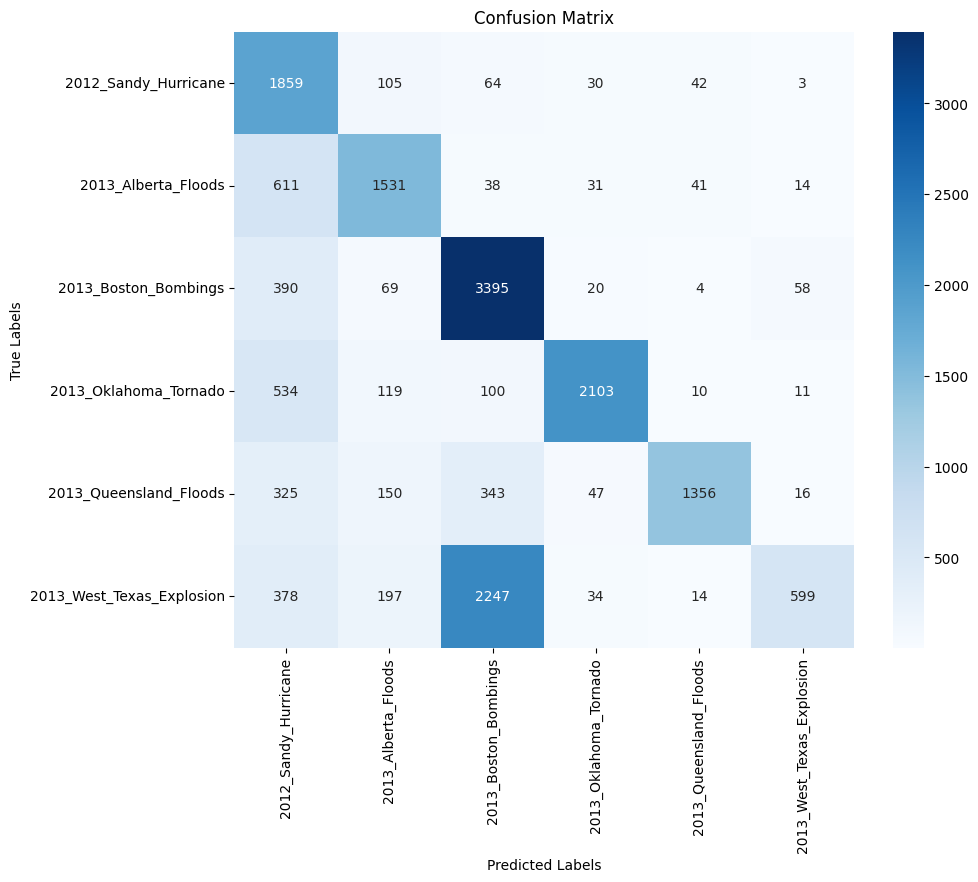

In [65]:
labels = sorted(df['label'].unique())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

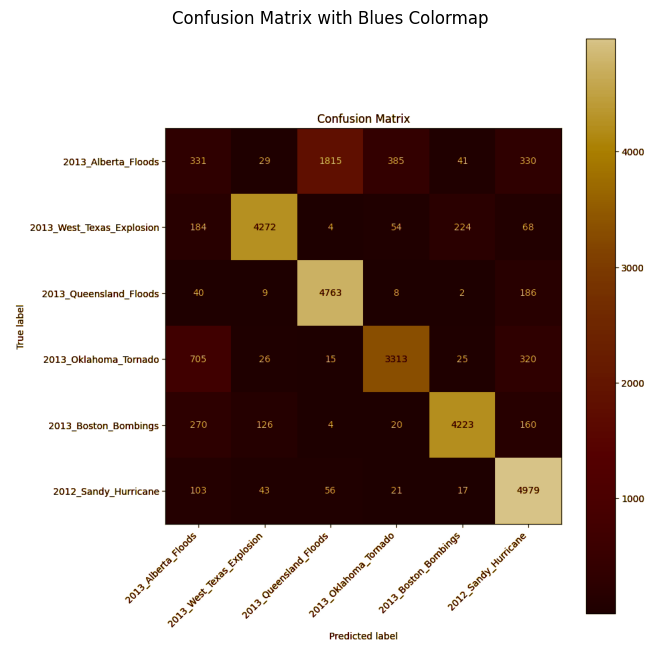

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the existing confusion matrix plot image
image_path = '/kaggle/input/eicplot/eic.png'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the 'Blues' colormap
colored_image = cv2.applyColorMap(gray_image, cv2.COLORMAP_OCEAN)

# Display the image using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(colored_image)
plt.axis('off')  # Hide the axis
plt.title('Confusion Matrix with Blues Colormap')
plt.show()


In [3]:
import cv2
import pytesseract
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the image
image_path = '/kaggle/input/eicplot/eic.png'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply OCR to extract text
ocr_result = pytesseract.image_to_string(gray_image, config='--psm 6')

# Extract numbers from the OCR result
lines = ocr_result.split('\n')
confusion_matrix_data = []
for line in lines:
    numbers = [int(s) for s in line.split() if s.isdigit()]
    if numbers:
        confusion_matrix_data.append(numbers)

# Convert the list to a NumPy array
confusion_matrix_array = np.array(confusion_matrix_data)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix_array, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix with Blues Colormap')
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (14,) + inhomogeneous part.

In [1]:
print(100)

100


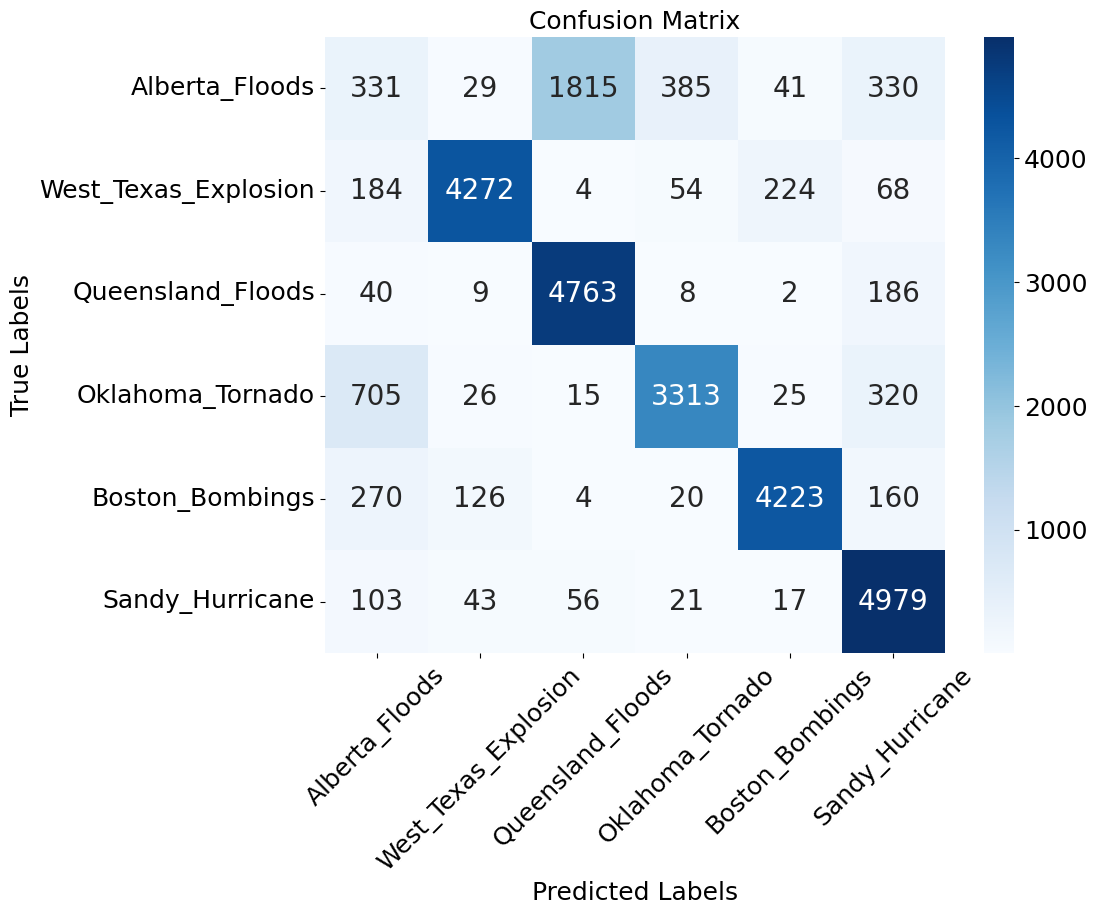

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

topic_mapping = {
    0: '2013_West_Texas_Explosion',
    1: '2013_Queensland_Floods',
    2: '2012_Sandy_Hurricane',
    3: '2013_Boston_Bombings',
    4: '2013_Oklahoma_Tornado',
    5: '2013_Alberta_Floods',
    
}

# Example data
columns = ['Alberta_Floods','West_Texas_Explosion','Queensland_Floods','Oklahoma_Tornado','Boston_Bombings','Sandy_Hurricane']  # Column names
values = [
    [331,29,1815,385,41,330],
    [184,4272,4,54,224,68],
    [40,9,4763,8,2,186],
    [705,26,15,3313,25,320],
    [270,126,4,20,4223,160],
    [103,43,56,21,17,4979]
]

# Create a DataFrame
df_cm = pd.DataFrame(values, index=columns, columns=columns)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
ax=sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 20})
plt.xlabel('Predicted Labels', fontsize=18)
plt.ylabel('True Labels', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks( fontsize=18)
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=18)
plt.show()
